# Implémentez un modèle de scoring

# Sommaire

**1. Préambule**<br />
&emsp;1.1 Problématique<br />
&emsp;1.2 Objectifs dans ce projet<br />
&emsp;&emsp;1.2.1 Spécifications du dashboard<br />
**2. Import des librairies & Réglages**<br />
**3. Exploration des données**<br />
&emsp;3.1 Informations avant de débuter<br />
&emsp;&emsp;3.1.1 Indication sur l'origines des informations qui vont suivre<br />
&emsp;&emsp;3.1.2 Informations sur les différentes sources de données<br />
mises à disposition<br />
&emsp;&emsp;3.1.3 Métrique utilisée: ROC AUC<br />
&emsp;3.2 Lecture des données<br />
&emsp;3.3 Analyse de la distribution de la colonne TARGET<br />
&emsp;3.4 Analyse des valeurs manquantes<br />
&emsp;3.5 Types des colonnes<br />
&emsp;3.6 Encodage des variables catégorielles<br />
&emsp;&emsp;3.6.1 Label Encoding et One-Hot Encoding<br />
&emsp;3.7 Alignement des données de formation et de test<br />
&emsp;3.8 Analyse et Gestion des valeurs aberrantes<br />
&emsp;3.9 Etude des Corrélations<br />
&emsp;&emsp;3.9.1 Corrélation de toutes les variables entre-elles<br />
&emsp;&emsp;3.9.2 Effet de l'âge sur le remboursement des prêts<br />
&emsp;&emsp;3.9.3 Sources extérieures<br />
&emsp;&emsp;3.9.4 Pairs Plot<br />
**4. Feature Engineering**<br />
&emsp;4.1 Import des fonctions<br />
&emsp;&emsp;4.1.1 Import des fonctions originales et modifiées<br />
&emsp;&emsp;4.1.2 Import de mes fonctions<br />
&emsp;4.2 PreProcessing de df<br />
**5. Préparation des données pour les parties Maching Learning et Dashboard**<br />
**6. Machine Learning**<br />
&emsp;6.1 Notes sur la fonction bestAlgo<br />
&emsp;6.2 Pré-sélection d'algorithmes<br />
&emsp;6.3 Définition du Seuil<br />
**7. Dashboard & API**<br />
&emsp;7.1 URL<br />
&emsp;7.2 Pré-Visualisation du dashboard<br />
&emsp;7.3 Passage en revue des différentes parties du Dashboard<br />
&emsp;&emsp;7.3.1 Partie Haute - Logo, Saisie et Validation du prêt<br />
&emsp;&emsp;&emsp;7.3.1.1 Logo<br />
&emsp;&emsp;&emsp;7.3.1.2 Saisie du numéro de prêt<br />
&emsp;&emsp;&emsp;7.3.1.3 Validation ou Refus du prêt<br />
&emsp;&emsp;7.3.2 Partie Centrale<br />
&emsp;&emsp;&emsp;7.3.2.1 Gauge Chart<br />
&emsp;&emsp;&emsp;7.3.2.2 Logo d'acceptation ou de refus de prêt<br />
&emsp;&emsp;&emsp;7.3.2.3 Graphiques des features importances <br />
&emsp;&emsp;&emsp;&emsp;7.3.2.3.1 Globales<br />
&emsp;&emsp;&emsp;&emsp;7.3.2.3.2 Locales<br />
&emsp;&emsp;&emsp;&emsp;7.3.2.4 Analyse mono-variée / Diagramme de distribution pour le choix de la 1ère et 2nd caractéristique<br />
&emsp;&emsp;&emsp;7.3.2.5 Analyse bi-variée / Scatter Plot 2D<br />
&emsp;&emsp;&emsp;7.3.2.6 3ème caractéristique et Scatter Plot 3D<br />
**8. Conclusion**

# 1. Préambule

## 1.1 Problématique

La société financière "**Prêt à dépenser**" propose des crédits<br />
à la consommation pour des personnes ayant peu ou pas du tout<br />
d'historique de prêt.

L’entreprise souhaite développer un modèle de scoring de la probabilité <br />
de défaut de paiement du client pour étayer la décision d'accorder ou <br />
non un prêt à un client potentiel en s’appuyant sur des sources de <br />
données variées (données comportementales, données provenant d'autres <br />
institutions financières, etc.).

De plus, les chargés de relation client ont fait remonter le fait <br />
que les clients sont de plus en plus demandeurs de transparence <br />
vis-à-vis des décisions d’octroi de crédit.

Il nous est donc confié le développement d'un dashboard interactif <br />
pour que les chargés de relation client puissent à la fois expliquer <br />
de façon la plus transparente possible les décisions d’octroi de crédit, <br />
mais également permettre à leurs clients de disposer de <br />
leurs informations personnelles et de les explorer facilement.

## 1.2 Objectifs dans ce projet

1. Construire un modèle de scoring qui donnera une prédiction <br />
   sur la probabilité de faillite d'un client de façon automatique.<br />
2. Construire un dashboard interactif à destination des gestionnaires <br />
   de la relation client permettant d'interpréter les prédictions <br />
   faites par le modèle et d’améliorer la connaissance client <br />
   des chargés de relation client.

### 1.2.1 Spécifications du dashboard

<u>Le dashboard devra à minima contenir les fonctionnalités suivantes</u> :

- Permettre de visualiser le score et l’interprétation de ce score <br />
   pour chaque client de façon intelligible pour une personne non <br />
   experte en data science.
- Permettre de visualiser des informations descriptives relatives <br />
   à un client (via un système de filtre).
- Permettre de comparer les informations descriptives relatives <br />
  à un client à l’ensemble des clients ou à un groupe de clients similaires.

# 2. Import des librairies & Réglages

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import gc
import time
import pickle
import os
import re
from contextlib import contextmanager

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV,\
    cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBRegressor
from lightgbm import LGBMClassifier
from sklearn.dummy import DummyClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import auc, roc_auc_score, confusion_matrix

In [3]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# Global Variable
globalLevelDebug = 1 # Verbosity level for displaying execution tracking information for long runtime functions
globalRS = 1 # Random_State

# 3. Exploration des données

## 3.1 Informations avant de débuter

### 3.1.1 Indication sur l'origine des informations qui vont suivre

Pour cette phase, je m'inspire du kernel Kaggle suivant: [Start Here: A Gentle Introduction](https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction)

Grâce à ce kernel et aux explications de son auteur, <br />
nous ferons une exploration de données destinée à expliquer <br />
et interprêter le plus simplement possible les données du projet.<br />
Le traitement réalisé sur les données dans cette partie<br />
sera différent du traitement réalisé sur les données dans <br />
la partie projet, où l'objectif sera l'efficacité. <br />
Nous nous appuyerons alors sur un autre kernel, moins intuitif <br />
au premier abord mais plus efficace <br />
dans le traitement des données et grâce auquel nous <br />
obtiendrons un meilleur résultat (score) lors du test<br />
de nos algorithmes.

L'analyse exploratoire des données (AED) est un processus ouvert <br />
dans lequel nous calculons des statistiques et faisons des <br />
figures pour trouver des tendances, des anomalies, des modèles <br />
ou des relations dans les données. L'objectif de l'AED est <br />
d'apprendre ce que nos données peuvent nous dire. <br />
Elle commence généralement par une vue d'ensemble de haut niveau, <br />
puis se concentre sur des domaines spécifiques au fur et à mesure <br />
que nous trouvons des zones intrigantes dans les données. <br />
Les résultats peuvent être intéressants en soi ou servir à éclairer <br />
nos choix de modélisation, par exemple en nous aidant à décider <br />
des caractéristiques à utiliser.

### 3.1.2 Informations sur les différentes sources de données <br />    mises à disposition

Les données sont issues d'un concours organisé sur Kaggle par l'entreprise "**Home Credit**".

*Home Credit* est un service dédié à la fourniture de prêts à la population non bancarisée.<br />
Prédire si un client remboursera ou non un prêt ou s'il aura des difficultés est un besoin commercial essentiel,<br />
et *Home Credit* organise cette compétition sur **Kaggle** pour voir quel type de modèles la communauté <br />
de l'apprentissage automatique peut développer pour l'aider dans cette tâche.

<u>Il y a 7 sources de données différentes</u> :

- **application_train/application_test** : les principales données de train et de test avec <br />
  des informations sur chaque demande de prêt chez *Home Credit*. <br />
  Chaque prêt a sa propre ligne et est identifié par la caractéristique **SK_ID_CURR**. <br />
  Les données de train sont accompagnées de la caractéristique **TARGET** <br />
  indiquant **0** : le prêt a été remboursé ou **1** : le prêt n'a pas été remboursé.<br />
  <u>Dans ce projet, nous ne participons pas au concours Kaagle, nous n'utiliserons donc pas <br />
    les données de application_test qui ne contiennent pas la colonne **TARGET**.<br />
    Nous n'utiliserons que les données contenues dans **application_train** <br />
    puis nous spliterons nous même nos données en un jeu de train et un jeu de test.</u>
- **bureau** : données concernant les crédits antérieurs du client auprès <br />
  d'autres institutions financières. Chaque crédit précédent a sa propre ligne <br /><
  dans bureau, mais un prêt existant dans **application_(train|test)** peut <br />
  avoir plusieurs crédits précédents.
- **bureau_balance** : données mensuelles concernant les crédits précédents dans **bureau**. <br />
  Chaque ligne correspond à un mois de crédit précédent, et un crédit précédent <br />
  unique peut avoir plusieurs lignes, une pour chaque mois de la durée du crédit.
- **previous_application** : demandes précédentes de prêts a *Home Credit* des clients <br />
  qui ont des prêts dans les données de **application_(train|test)**. Chaque prêt actuel <br />
  dans les données de **application_(train|test)** peut avoir plusieurs prêts précédents. <br />
  Chaque demande précédente a une ligne et est identifiée par la caractéristique **SK_ID_PREV**.
- **POS_CASH_BALANCE** : données mensuelles sur les prêts au point de vente ou en <br />
  espèces que les clients ont eu avec *Home Credit*. Chaque ligne correspond à un mois <br />
  d'un prêt au point de vente ou d'un prêt en espèces précédent, et un seul prêt <br />
  précédent peut avoir plusieurs lignes.
- **credit_card_balance** : données mensuelles sur les cartes de crédit que les clients <br />
  ont eu avec *Home Credit*. Chaque ligne correspond à un mois de solde de carte de crédit, <br />
  et une seule carte de crédit peut avoir plusieurs lignes.
- **installments_payment** : historique des paiements pour les prêts précédents <br />
  chez *Home Credit*. Il y a une ligne pour chaque paiement effectué et une ligne <br />
  pour chaque paiement manqué.

<u>Ce diagramme montre comment toutes les données sont liées:</u>

![Ce diagramme montre comment toutes les données sont liées](img/home_credit.png)

### 3.1.3 Métrique utilisée: ROC AUC

J'utiliserai la métrique ROC AUC dans ce projet. <br />
La même métrique a été utilisée dans le concours Kaggle.

Il s'agit d'une métrique de classification commune <br />
connue sous le nom d'*aire sous la courbe de la caractéristique <br />
d'exploitation du récepteur* (ROC AUC, parfois aussi appelée AUROC).

La ROC AUC peut sembler intimidante, mais elle est relativement simple <br />
une fois que vous avez compris les deux concepts individuels:
- La courbe **ROC** (Reciever Operating Characteristic) est un graphique <br />
  représentant les performances d'un modèle de classification pour tous <br />
  les seuils de classification. Cette courbe trace le taux de vrais positifs <br />
  en fonction du taux de faux positifs
- L'aire sous la courbe (AUC) s'explique par son nom ! Il s'agit simplement <br />
  de l'aire sous la courbe ROC. (Il s'agit de l'intégrale de la courbe) <br />
  Cette métrique est comprise entre 0 et 1, un meilleur modèle obtenant <br />
  un score plus élevé. Un modèle qui se contente de deviner au hasard <br />
  aura une AUC ROC de 0,5.

Lorsque nous mesurons un classificateur selon l'AUC ROC, <br />
nous ne générons pas des prédictions 0 ou 1, mais plutôt <br />
une probabilité entre 0 et 1. Cela peut prêter à confusion <br />
car nous aimons généralement penser en termes de précision, <br />
mais lorsque nous sommes confrontés à des problèmes de classes <br />
déséquilibrées (nous verrons que c'est le cas), la précision <br />
n'est pas la meilleure métrique. Par exemple, si je voulais <br />
construire un modèle capable de détecter les terroristes avec <br />
une précision de 99,9999 %, je créerais simplement un modèle <br />
qui prédit que chaque personne n'est pas un terroriste. <br />
Il est clair que cela ne serait pas efficace (le rappel serait nul)<br /> 
et nous utilisons des mesures plus avancées telles que le ROC AUC <br />
ou le score F1 pour refléter plus précisément les performances <br />
d'un classificateur. Un modèle avec un ROC AUC élevé aura <br />
également une précision élevée, mais le ROC AUC est une meilleure<br /> 
représentation de la performance du modèle.

![Représentation de plusieurs courbes ROC](img/ROC-curve.png)

## 3.2 Lecture des données
Tout d'abord, nous pouvons lister tous les fichiers de données disponibles.<br />
<u>Il y a un total de 9 fichiers</u> : 
- 1 fichier principal pour l'entraînement (avec la cible)
- 1 fichier principal pour le test (sans la cible)
- 1 fichier de soumission d'exemples
- et 6 autres fichiers contenant des informations supplémentaires sur chaque prêt.

In [5]:
# List files available
print(os.listdir("input/"))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [6]:
# Training data
app_train = pd.read_csv('input/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Les données d'apprentissage comportent 307511 observations (chacune étant un prêt distinct) <br />
et 122 caractéristiques (variables), y compris la TARGET (l'étiquette que nous voulons prédire).

In [7]:
# Testing data features
app_test = pd.read_csv('input/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


L'ensemble de test est considérablement plus petit et ne comporte pas de colonne TARGET.

Nous utiliserons ce jeu de données comme base clients lors de l'utilisation <br />
du Dashboard interactif que nous verrons plus loin dans ce projet.

## 3.3 Analyse de la distribution de la colonne TARGET

La target (cible en Français) est ce que l'on nous demande de prédire: 
 - soit un 0 pour le prêt a été remboursé à temps
 - soit un 1 indiquant que le client a eu des difficultés de paiement.
 
 Nous pouvons d'abord examiner le nombre de prêts entrant dans chaque catégorie.

In [8]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [9]:
app_train['TARGET'].value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

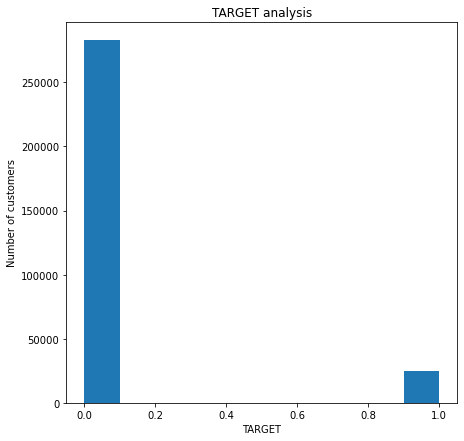

In [10]:
plt.figure(figsize=(7,7))
plt.hist(app_train['TARGET'].astype(int))
plt.title('TARGET analysis')
plt.xlabel('TARGET')
plt.ylabel('Number of customers')
plt.show()

D'après ces informations, nous constatons qu'il <br />
s'agit d'un problème de classes déséquilibrées. <br />
Il y a beaucoup plus de prêts qui ont été remboursés <br />
à temps que de prêts qui n'ont pas été remboursés. <br />
Lorsque nous utiliserons des modèles d'apprentissage <br />
automatique plus sophistiqués, nous pourrons pondérer <br />
les classes en fonction de leur représentation dans <br />
les données afin de refléter ce déséquilibre.

## 3.4 Analyse des valeurs manquantes
Examinons le nombre et le pourcentage <br />
de valeurs manquantes dans chaque colonne:

In [11]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [12]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


Au moment de construire nos modèles d'apprentissage automatique, <br />
nous devrons compléter ces valeurs manquantes (ce que l'on appelle l'imputation). <br />
Dans les travaux ultérieurs, nous utiliserons des modèles tels que XGBoost <br />
qui peuvent gérer les valeurs manquantes sans qu'il soit nécessaire <br />
de procéder à une imputation. <br />
Une autre option serait de supprimer les colonnes présentant un pourcentage <br />
élevé de valeurs manquantes, mais il est impossible de savoir à l'avance <br />
si ces colonnes seront utiles à notre modèle. <br />
Par conséquent, nous conserverons toutes les colonnes pour le moment.

## 3.5 Types des colonnes
Examinons le nombre de colonnes de chaque type de données. <br />
int64 et float64 sont des variables numériques (qui peuvent <br />
être discrètes ou continues). les colonnes d'objets contiennent <br />
des chaînes de caractères et sont des caractéristiques catégorielles.

In [13]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

Examinons maintenant le nombre d'entrées uniques <br />
dans chacune des colonnes d'objets:

In [14]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

La plupart des variables catégorielles ont <br />
un nombre relativement faible d'entrées uniques. <br />
Nous devrons trouver un moyen de traiter <br />
ces variables catégorielles.

## 3.6 Encodage des variables catégorielles

Avant d'aller plus loin, nous devons nous occuper de ces variables catégorielles. <br />
Un modèle d'apprentissage automatique ne peut malheureusement pas <br />
traiter les variables catégorielles (à l'exception de certains <br />
modèles tels que LightGBM). Par conséquent, nous devons trouver <br />
un moyen de coder (représenter) ces variables sous forme de nombres <br />
avant de les transmettre au modèle. <br />
Il existe deux façons principales d'effectuer ce processus :

- Label encoding : attribuer un nombre entier à chaque catégorie <br />
  unique d'une variable catégorielle. Aucune nouvelle colonne <br />
  n'est créée. Un exemple est présenté ci-dessous

![Représentation de Label Encoding](img/label_encoding.png)

- One-hot encoding : créer une nouvelle colonne pour chaque <br />
  catégorie unique dans une variable catégorielle. <br />
  Chaque observation reçoit un 1 dans la colonne pour sa catégorie <br />
  correspondante et un 0 dans toutes les autres nouvelles colonnes.

![Représentation de One Hot Encoding](img/one_hot_encoding.png)

Le problème de **label encoding** est qu'il donne aux catégories <br />
un ordre arbitraire. La valeur attribuée à chacune des catégories <br />
est aléatoire et ne reflète aucun aspect inhérent à la catégorie. <br />
Dans l'exemple ci-dessus, le programmeur reçoit un 4 et le spécialiste <br />
des données un 1, mais si nous refaisions le même processus, <br />
les étiquettes pourraient être inversées ou complètement différentes. <br />
L'affectation réelle des entiers est arbitraire. <br />
Par conséquent, lorsque nous effectuons le label encoding, le modèle <br />
peut utiliser la valeur relative de la caractéristique (par exemple, <br />
programmeur = 4 et scientifique = 1) pour attribuer des poids, <br />
ce qui n'est pas ce que nous voulons. Si nous n'avons que deux valeurs <br />
uniques pour une variable catégorielle (telle que Male/Femelle), <br />
l'encodage label encoding est parfait, mais pour plus de deux <br />
catégories uniques, l'encodage **One Hot Encoder** est l'option la plus sûre.

Les mérites relatifs de ces approches font l'objet d'un débat, <br />
et certains modèles peuvent traiter des variables catégorielles <br />
codées par étiquette sans problème. Je pense que pour les variables <br />
catégorielles avec de nombreuses classes, l'encodage **One Hot Encoder** <br />
est l'approche la plus sûre car elle n'impose pas de valeurs arbitraires <br />
aux catégories. 
Le seul inconvénient de l'encodage one-hot est que le nombre <br />
de caractéristiques (dimensions des données) peut exploser <br />
avec des variables catégorielles comportant de nombreuses catégories. <br />
Pour y remédier, nous pouvons effectuer un codage One-Hot <br />
suivi d'une ACP ou d'autres méthodes de réduction de la dimensionnalité <br />
pour réduire le nombre de dimensions (tout en essayant de préserver l'information).

Dans ce notebook, nous utiliserons l'encodage **label encoding** <br />
pour toutes les variables catégorielles avec seulement 2 catégories <br />
et l'encodage **One Hot Encoder** pour toutes les variables <br />
catégorielles avec plus de 2 catégories. <br />
Ce processus peut être modifié à mesure que nous avançons dans <br />
le projet, mais pour l'instant, nous allons voir où cela nous mène.

### 3.6.1 Label Encoding et One-Hot Encoding

Mettons en œuvre la politique décrite ci-dessus : pour toute variable <br />
catégorielle (dtype == object) avec 2 catégories uniques, nous <br />
utiliserons **Label Encoding**, et pour toute variable catégorielle <br />
avec plus de 2 catégories uniques, nous utiliserons **One-Hot Encoding**.

Pour **Label Encoding**, nous utilisons le *LabelEncoder de Scikit-Learn* <br />
et pour **One-Hot Encoding**, la fonction *pandas get_dummies(df)*.

In [15]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [16]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


## 3.7 Alignement des données de formation et de test

Il doit y avoir les mêmes caractéristiques (colonnes) dans les données <br />
de train et de test. L'encodage One-Hot a créé plus de colonnes dans <br />
les données de train parce que certaines variables catégorielles ont <br />
des catégories non représentées dans les données de test. <br />
Pour supprimer les colonnes dans les données de train qui ne sont pas <br />
dans les données de test, nous devons aligner les dataframes. <br />
Tout d'abord, nous extrayons la colonne cible des données de train <br />
(car elle ne figure pas dans les données de test mais nous devons <br />
conserver cette information).<br />
Lorsque nous effectuons l'alignement, nous devons nous assurer de <br />
définir **axis = 1** pour aligner les dataframes sur les colonnes <br />
et non sur les lignes !

In [17]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


Les ensembles de données de train et de test ont maintenant <br />
les mêmes caractéristiques, ce qui est nécessaire pour <br />
l'apprentissage automatique. <br />
Le nombre de caractéristiques a considérablement augmenté <br />
en raison de l'encodage **One-Hot**. <br />
À un moment donné, nous voudrons probablement essayer<br /> 
la réduction de la dimensionnalité (en supprimant les <br />
caractéristiques qui ne sont pas pertinentes) pour <br />
réduire la taille des ensembles de données.

## 3.8 Analyse et Gestion des valeurs aberrantes

Les valeurs aberrantes dans les données sont un problème auquel <br />
nous devons toujours être attentifs lorsque nous faisons de l'AED. <br />
Celles-ci peuvent être dues à des chiffres mal saisis, à des erreurs <br />
dans l'équipement de mesure ou à des mesures valides mais extrêmes. <br />
Une façon d'étayer les valeurs aberrantes de manière quantitative <br />
est d'examiner les statistiques d'une colonne en utilisant <br />
la méthode de description. <br />
Les chiffres de la colonne DAYS_BIRTH sont négatifs car ils <br />
sont enregistrés par rapport à la demande de prêt en cours. 

Pour voir ces statistiques en années, nous pouvons les <br />
multiplier par -1 et les diviser par le nombre de jours dans une année :

In [18]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

Ces âges semblent raisonnables. <br />
Il n'y a pas de valeurs aberrantes pour l'âge, <br />
ni en haut ni en bas. <br />
Et pour la colonne représentant le nombre <br />
de jours depuis la date de début d'emploi ?

In [19]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Cela ne semble pas correct ! <br />
La valeur maximale (en plus d'être positive) <br />
est d'environ 1000 ans !

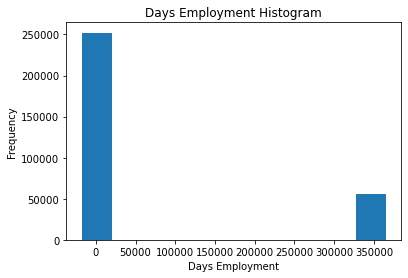

In [20]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

Juste par curiosité, sous-ensemblons les clients anormaux <br />
et voyons s'ils ont tendance à avoir des taux de défaillance <br />
plus élevés ou plus faibles que le reste des clients:

In [21]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


C'est extrêmement intéressant ! <br />
Il s'avère que les anomalies ont un taux de défaillance plus faible.

Le traitement des anomalies dépend de la situation exacte, <br />
et il n'existe pas de règles fixes. L'une des approches <br />
les plus sûres consiste à définir les anomalies comme <br />
des valeurs manquantes, puis à les compléter (en utilisant <br />
l'imputation) avant l'apprentissage automatique. 

Dans ce cas, puisque toutes les anomalies ont exactement <br />
la même valeur, nous voulons les compléter avec la même <br />
valeur au cas où tous ces prêts ont quelque chose en commun. <br />
Les valeurs anormales semblent avoir une certaine importance, <br />
nous voulons donc indiquer au modèle d'apprentissage automatique <br />
si nous avons effectivement rempli ces valeurs. <br />
Comme solution, nous allons remplir les valeurs anormales <br />
avec un nombre nul (np.nan) et ensuite créer une nouvelle <br />
colonne booléenne indiquant si la valeur était anormale ou non.

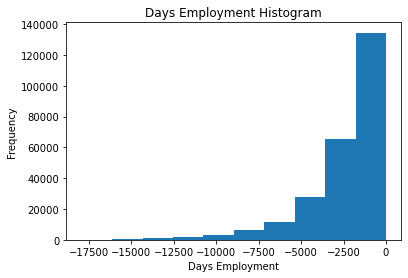

In [22]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

La distribution semble beaucoup plus conforme à ce que nous attendions, <br />
et nous avons également créé une nouvelle colonne pour indiquer au modèle <br />
que ces valeurs étaient à l'origine anormales (car nous devrons remplir <br />
les nans avec une valeur quelconque, probablement la médiane de la colonne). <br />
Les autres colonnes contenant des jours dans la trame de données semblent <br />
correspondre à ce que nous attendons, sans valeurs aberrantes évidentes.

Il est extrêmement important de noter que tout ce que nous faisons <br />
sur les données de formation doit également être fait sur les données de test. <br />
Veillons à créer la nouvelle colonne et à remplir la colonne existante <br />
avec np.nan dans les données de test.

In [23]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


## 3.9 Etude des Corrélations

Maintenant que nous avons traité les variables catégorielles <br />
et les valeurs aberrantes, poursuivons avec l'AED. Une façon <br />
d'essayer de comprendre les données est de rechercher des <br />
corrélations entre les caractéristiques et la cible. <br />
Nous pouvons calculer le coefficient de corrélation de Pearson <br />
entre chaque variable et la cible en utilisant la méthode .corr <br />
applicable aux dataframes de Pandas.

Le coefficient de corrélation n'est pas la meilleure méthode <br />
pour représenter la "pertinence" d'une caractéristique, <br />
mais il nous donne une idée des relations possibles au sein <br />
des données. 

Voici quelques interprétations générales <br />
de la valeur absolue du coefficient de corrélation :

- 0,00-0,19 "très faible"
- 0,20 à 0,39 "faible"
- 0,40-0,59 "modéré"
- 0,60-0,79 "forte"
- 0,80-1,0 "très forte"

### 3.9.1 Corrélation de toutes les variables entre-elles

In [24]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

<u>Regardons certaines des corrélations les plus significatives</u> : <br />
La corrélation **DAYS_BIRTH** est la plus positive. (sauf pour TARGET car <br />
la corrélation d'une variable avec elle-même est toujours de 1 !) <br />
En regardant la documentation, **DAYS_BIRTH** est l'âge en jours du client <br />
au moment du prêt en jours négatifs. <br />
La corrélation est positive, mais la valeur de cette caractéristique <br />
est en fait négative, ce qui signifie que plus le client vieillit, <br />
moins il est susceptible de ne pas rembourser son prêt (c'est-à-dire <br />
que la cible == 0). C'est un peu déroutant, nous allons donc prendre <br />
la valeur absolue de la caractéristique et la corrélation sera alors négative.

### 3.9.2 Effet de l'âge sur le remboursement des prêts

In [25]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830984513

Au fur et à mesure que le client vieillit, il existe une relation <br />
linéaire négative avec la **target**, ce qui signifie que plus les <br />
clients vieillissent, plus ils ont tendance à rembourser leurs prêts dans les délais.

Commençons à examiner cette variable. <br />
Tout d'abord, nous pouvons faire un histogramme de l'âge. <br />
Nous allons mettre l'axe des x en années <br />
pour rendre le graphique un peu plus compréhensible.

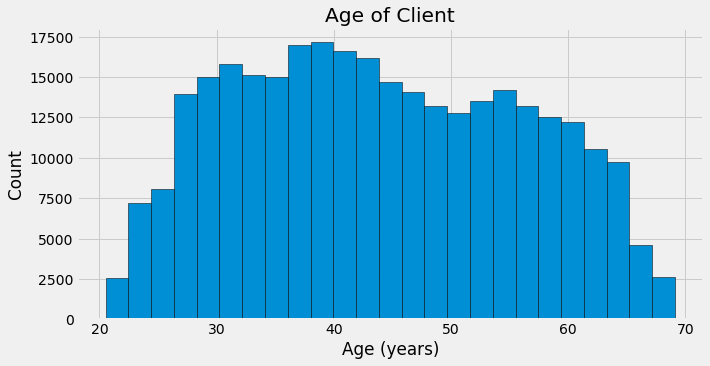

In [26]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.figure(figsize=(10,5))
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

En soi, la distribution de l'âge ne nous apprend pas grand-chose, <br />
si ce n'est qu'il n'y a pas de valeurs aberrantes puisque <br />
tous les âges sont raisonnables. <br />
Pour visualiser l'effet de l'âge sur la cible, nous allons ensuite <br />
réaliser un graphique d'estimation de la densité du noyau (KDE) <br />
coloré par la valeur de la cible. <br />
Un graphique d'estimation de la densité du noyau montre la <br />
distribution d'une seule variable et peut être considéré <br />
comme un histogramme lissé.<br />
Nous utiliserons le **kdeplot de Seaborn** pour ce graphique.

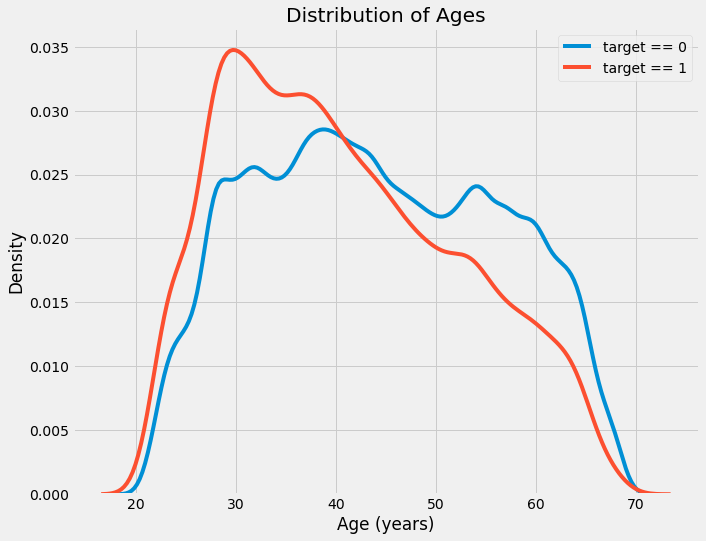

In [27]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages')

plt.legend()
plt.show()

La courbe de la cible == 1 penche vers l'extrémité la plus jeune de la fourchette. <br />
Bien qu'il ne s'agisse pas d'une corrélation significative (coefficient <br />
de corrélation de -0,07), cette variable sera probablement utile <br />
dans un modèle d'apprentissage automatique car elle affecte la cible. <br />
Examinons cette relation d'une autre manière : l'échec moyen du <br />
remboursement des prêts par tranche d'âge.

Pour réaliser ce graphique, nous découpons d'abord la catégorie d'âge <br />
en tranches de 5 ans chacune. Ensuite, pour chaque bac, nous calculons <br />
la valeur moyenne de la cible, qui nous indique le ratio de prêts <br />
non remboursés dans chaque catégorie d'âge.

In [28]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [29]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


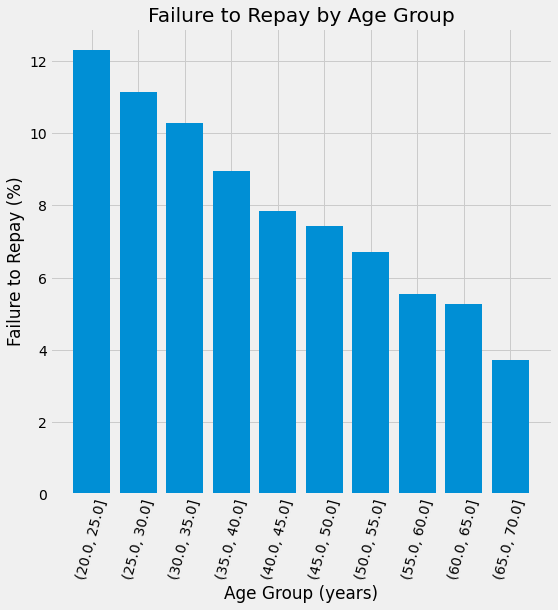

In [30]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

La tendance est claire : les jeunes demandeurs sont plus susceptibles <br />
de ne pas rembourser le prêt ! Le taux de non-remboursement est <br />
supérieur à 10 % pour les trois groupes d'âge les plus jeunes <br />
et inférieur à 5 % pour le groupe le plus âgé.

Il s'agit d'une information qui pourrait être utilisée directement <br />
par la banque : puisque les clients les plus jeunes sont moins <br />
susceptibles de rembourser le prêt, il faudrait peut-être leur <br />
fournir davantage de conseils ou d'astuces de planification financière. <br />
Cela ne signifie pas que la banque doive faire preuve de discrimination <br />
à l'égard des jeunes clients, mais il serait judicieux de prendre <br />
des mesures de précaution pour aider les jeunes clients à rembourser dans les délais.

### 3.9.3 Sources extérieures

Les 3 variables présentant les corrélations négatives les plus <br />
fortes avec la cible sont EXT_SOURCE_1, EXT_SOURCE_2 et EXT_SOURCE_3. <br />
Selon la documentation, ces caractéristiques représentent un "score <br />
normalisé provenant d'une source de données externe". <br />
Je ne suis pas sûr de ce que cela signifie exactement, <br />
mais il peut s'agir d'une sorte de notation cumulative <br />
réalisée à partir de nombreuses sources de données.

Jetons un coup d'œil à ces variables:

Tout d'abord, nous pouvons montrer les corrélations des <br />
caractéristiques EXT_SOURCE avec la cible et entre elles.

In [31]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


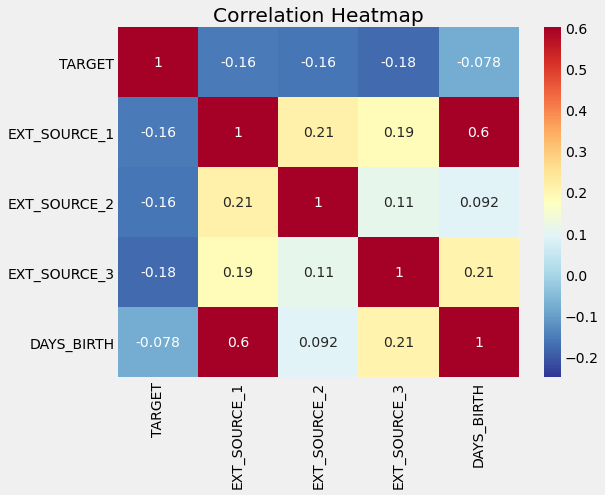

In [32]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

Les trois caractéristiques EXT_SOURCE ont des corrélations négatives <br />
avec la cible, ce qui indique que plus la valeur de l'EXT_SOURCE <br />
augmente, plus le client est susceptible de rembourser le prêt. <br />
Nous pouvons également voir que DAYS_BIRTH est positivement corrélé <br />
avec EXT_SOURCE_1, ce qui indique que l'un des facteurs de ce score <br />
est peut-être l'âge du client.

Ensuite, nous pouvons examiner la distribution de chacune de <br />
ces caractéristiques colorées par la valeur de la cible. <br />
Cela nous permettra de visualiser l'effet de cette variable sur la cible.

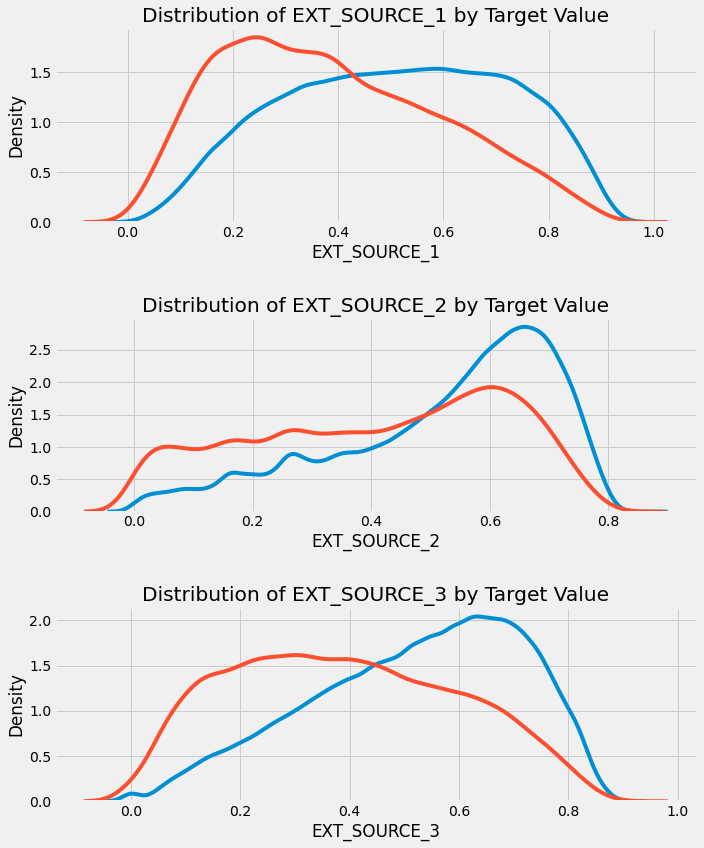

In [33]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

EXT_SOURCE_3 affiche la plus grande différence entre les valeurs de la cible. <br />
Nous pouvons clairement voir que cette caractéristique a une certaine relation <br />
avec la probabilité qu'un demandeur rembourse un prêt. <br />
La relation n'est pas très forte (en fait, elles sont toutes considérées <br />
comme très faibles), mais ces variables seront toujours utiles pour un modèle <br />
d'apprentissage automatique permettant de prédire si un demandeur <br />
remboursera ou non un prêt à temps.

### 3.9.4 Pairs Plot

Comme dernier graphique exploratoire, nous pouvons réaliser un graphique <br />
en paires des variables EXT_SOURCE et de la variable DAYS_BIRTH. <br />
Le graphique en paires est un excellent outil d'exploration car <br />
il nous permet de voir les relations entre plusieurs paires de <br />
variables ainsi que les distributions de variables uniques. <br />
Ici, nous utilisons la bibliothèque de visualisation seaborn <br />
et la fonction PairGrid pour créer un Pairs Plot avec des nuages <br />
de points sur le triangle supérieur, des histogrammes sur la diagonale, <br />
et des diagrammes de densité de noyau 2D et des coefficients <br />
de corrélation sur le triangle inférieur.

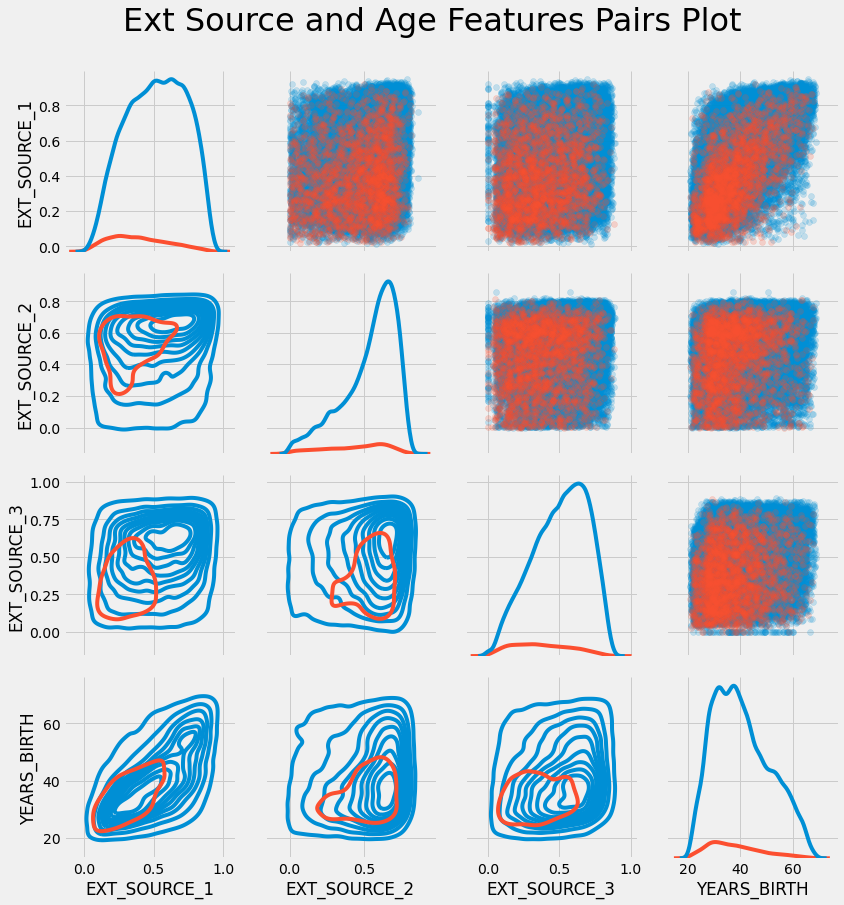

In [34]:
# Copy the data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

Dans ce graphique, le rouge indique les prêts qui n'ont pas été remboursés <br />
et le bleu les prêts qui sont payés. Nous pouvons voir les différentes <br />
relations au sein des données. Il semble y avoir une relation linéaire <br />
positive modérée entre l'EXT_SOURCE_1 et le DAYS_BIRTH (ou équivalent YEARS_BIRTH), <br />
ce qui indique que cette caractéristique peut prendre en compte l'âge du client.

# 4. Feature Engineering

Les concours Kaggle sont remportés par la maitrise du <br />
Feature Engineering (l'ingénierie des caractéristiques) : <br />
les gagnants sont ceux qui peuvent créer les caractéristiques <br />
les plus utiles à partir des données. <br />
Cela représente l'une des tendances de l'apprentissage automatique : <br />
l'ingénierie des caractéristiques a un meilleur retour <br />
sur investissement que la construction de modèles et <br />
le réglage des hyperparamètres.

Si le choix du bon modèle et des paramètres optimaux est <br />
important, le modèle ne peut apprendre qu'à partir <br />
des données qui lui sont fournies. S'assurer que ces <br />
données sont aussi pertinentes que possible pour la tâche <br />
à accomplir est le travail du Data Scientist.

L'ingénierie des caractéristiques fait référence à un processus <br />
génétique et peut impliquer à la fois la construction de caractéristiques : <br />
ajouter de nouvelles caractéristiques à partir des données existantes, <br />
et la sélection de caractéristiques : choisir uniquement les <br />
caractéristiques les plus importantes ou d'autres méthodes de <br />
réduction de la dimensionnalité. Il existe de nombreuses techniques <br />
que nous pouvons utiliser pour créer et sélectionner des caractéristiques.

Pour cette étape, j'ai choisi de m'appuyer sur le kernel Kaggle suivant: <br />
[LightGBM with Simple Features](https://www.kaggle.com/jsaguiar/lightgbm-with-simple-features)

L'auteur réalise une approche par fonctions, ce qui est pratique en plus <br />
d'avoir un score public très satisfaisant de 0.79070.<br />
Cependant, je ne reprendrai pas son travail sur la partie Machine Learning, <br />
je réaliserai intégralement cette partie à partir de la 6ème partie de ce projet.

## 4.1 Import des fonctions

J'importe ici l'ensemble des fonctions qui nous seront utiles.<br />
Certaines de ces fonctions sont importées telle quelle depuis le kernel [LightGBM with Simple Features](https://www.kaggle.com/jsaguiar/lightgbm-with-simple-features).<br />
D'autres ont été modifiées pour coller à mes besoins.<br />
Enfin, j'importe ici également l'ensemble des fonctions que j'ai écrit pour ce projet.

### 4.1.1 Import des fonctions originales et modifiées

In [35]:
@contextmanager
def timer(title):
    '''
    This function allows to calculate the execution time of a function.
    Use with the tag "with('indicate here your title'):"
    '''
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

In [36]:
def one_hot_encoder(df, nan_as_category = True):
    '''
    This function one-encodes the data whose dtype is 'object' 
    using the get_dummies function of Pandas.
    '''
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [37]:
def application_train_test(num_rows = None, nan_as_category = False, train=True):
    '''
    This function loads and performs the preprocessing of the data 
    contained in application_train.csv and application_test.csv
    The first step is to merge the two files.
    The object categories are one-hot-encoded.
    Outliers are processed.
    Finally, it creates some simple new features.
    Output: Pre-processed data in Dataframe format
    '''
    df = pd.read_csv('./input/application_train.csv', nrows= num_rows)
    test_df = pd.read_csv('./input/application_test.csv', nrows= num_rows)
    print("Train samples: {}, test samples: {}".format(len(df), len(test_df)))
    df = df.append(test_df).reset_index(drop=True)
    
    print(f'df shape: {df.shape}')

    # Optional: Remove 4 applications with XNA CODE_GENDER (train set)
    df = df[df['CODE_GENDER'] != 'XNA']
    
    # Categorical features with Binary encode (0 or 1; two categories)
    for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
        df[bin_feature], uniques = pd.factorize(df[bin_feature])
    # Categorical features with One-Hot encode
    df, cat_cols = one_hot_encoder(df, nan_as_category)
    
    # NaN values for DAYS_EMPLOYED: 365.243 -> nan
    df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)
    # Some simple new features (percentages)
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
#     del test_df
    gc.collect()
    return df

In [38]:
def bureau_and_balance(num_rows = None, nan_as_category = True):
    '''
    This function loads and performs the preprocessing of the data 
    contained in bureau.csv and bureau_balance.csv and returns 
    the data in dataframe format.
    After applying a one-hot-encoder on the categories whose dtype is "object",
    the function performs various aggregation operations.
    The choice of the aggregation type has been selected, for each variable,
    by the developer in order to maximize the final score when using 
    the machine learning model.
    '''
    bureau = pd.read_csv('./input/bureau.csv', nrows = num_rows)
    bb = pd.read_csv('./input/bureau_balance.csv', nrows = num_rows)
    bb, bb_cat = one_hot_encoder(bb, nan_as_category)
    bureau, bureau_cat = one_hot_encoder(bureau, nan_as_category)
    
    # Bureau balance: Perform aggregations and merge with bureau.csv
    bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}
    for col in bb_cat:
        bb_aggregations[col] = ['mean']
    bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
    bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])
    bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')
    bureau.drop(['SK_ID_BUREAU'], axis=1, inplace= True)
    del bb, bb_agg
    gc.collect()
    
    # Bureau and bureau_balance numeric features
    num_aggregations = {
        'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
        'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
        'DAYS_CREDIT_UPDATE': ['mean'],
        'CREDIT_DAY_OVERDUE': ['max', 'mean'],
        'AMT_CREDIT_MAX_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
        'AMT_ANNUITY': ['max', 'mean'],
        'CNT_CREDIT_PROLONG': ['sum'],
        'MONTHS_BALANCE_MIN': ['min'],
        'MONTHS_BALANCE_MAX': ['max'],
        'MONTHS_BALANCE_SIZE': ['mean', 'sum']
    }
    # Bureau and bureau_balance categorical features
    cat_aggregations = {}
    for cat in bureau_cat: cat_aggregations[cat] = ['mean']
    for cat in bb_cat: cat_aggregations[cat + "_MEAN"] = ['mean']
    
    bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    bureau_agg.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])
    # Bureau: Active credits - using only numerical aggregations
    active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
    active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
    active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')
    del active, active_agg
    gc.collect()
    # Bureau: Closed credits - using only numerical aggregations
    closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
    closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
    closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')
    del closed, closed_agg, bureau
    gc.collect()
    return bureau_agg

In [39]:
def previous_applications(num_rows = None, nan_as_category = True):
    '''
    This function loads and performs the preprocessing of the data 
    contained in previous_applications.csv and returns 
    the data in dataframe format.
    After applying a one-hot-encoder on the categories whose dtype is "object",
    the function performs various aggregation operations.
    The choice of the aggregation type has been selected, for each variable,
    by the developer in order to maximize the final score when using 
    the machine learning model.
    '''
    prev = pd.read_csv('./input/previous_application.csv', nrows = num_rows)
    prev, cat_cols = one_hot_encoder(prev, nan_as_category= True)
    # Days 365.243 values -> nan
    prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
    prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)
    # Add feature: value ask / value received percentage
    prev['APP_CREDIT_PERC'] = prev['AMT_APPLICATION'] / prev['AMT_CREDIT']
    # Previous applications numeric features
    num_aggregations = {
        'AMT_ANNUITY': ['min', 'max', 'mean'],
        'AMT_APPLICATION': ['min', 'max', 'mean'],
        'AMT_CREDIT': ['min', 'max', 'mean'],
        'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'],
        'AMT_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
        'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
        'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'DAYS_DECISION': ['min', 'max', 'mean'],
        'CNT_PAYMENT': ['mean', 'sum'],
    }
    # Previous applications categorical features
    cat_aggregations = {}
    for cat in cat_cols:
        cat_aggregations[cat] = ['mean']
    
    prev_agg = prev.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    prev_agg.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() for e in prev_agg.columns.tolist()])
    # Previous Applications: Approved Applications - only numerical features
    approved = prev[prev['NAME_CONTRACT_STATUS_Approved'] == 1]
    approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
    approved_agg.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
    prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')
    # Previous Applications: Refused Applications - only numerical features
    refused = prev[prev['NAME_CONTRACT_STATUS_Refused'] == 1]
    refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
    refused_agg.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
    prev_agg = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')
    del refused, refused_agg, approved, approved_agg, prev
    gc.collect()
    return prev_agg

In [40]:
def pos_cash(num_rows = None, nan_as_category = True):
    '''
    This function loads and performs the preprocessing of the data 
    contained in POS_CASH_balance.csv and returns the data 
    the data in dataframe format.
    After applying a one-hot-encoder on the categories whose dtype is "object",
    the function performs various aggregation operations.
    The choice of the aggregation type has been selected, for each variable,
    by the developer in order to maximize the final score when using 
    the machine learning model.
    '''
    pos = pd.read_csv('./input/POS_CASH_balance.csv', nrows = num_rows)
    pos, cat_cols = one_hot_encoder(pos, nan_as_category= True)
    # Features
    aggregations = {
        'MONTHS_BALANCE': ['max', 'mean', 'size'],
        'SK_DPD': ['max', 'mean'],
        'SK_DPD_DEF': ['max', 'mean']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    
    pos_agg = pos.groupby('SK_ID_CURR').agg(aggregations)
    pos_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in pos_agg.columns.tolist()])
    # Count pos cash accounts
    pos_agg['POS_COUNT'] = pos.groupby('SK_ID_CURR').size()
    del pos
    gc.collect()
    return pos_agg

In [41]:
def installments_payments(num_rows = None, nan_as_category = True):
    '''
    This function loads and performs the preprocessing of the data 
    contained in installments_payments.csv and returns the data in 
    the data in dataframe format.
    After applying a one-hot-encoder on the categories whose dtype is "object",
    the function performs various aggregation operations.
    The choice of the aggregation type has been selected, for each variable,
    by the developer in order to maximize the final score when using 
    the machine learning model.
    '''
    ins = pd.read_csv('./input/installments_payments.csv', nrows = num_rows)
    ins, cat_cols = one_hot_encoder(ins, nan_as_category= True)
    # Percentage and difference paid in each installment (amount paid and installment value)
    ins['PAYMENT_PERC'] = ins['AMT_PAYMENT'] / ins['AMT_INSTALMENT']
    ins['PAYMENT_DIFF'] = ins['AMT_INSTALMENT'] - ins['AMT_PAYMENT']
    # Days past due and days before due (no negative values)
    ins['DPD'] = ins['DAYS_ENTRY_PAYMENT'] - ins['DAYS_INSTALMENT']
    ins['DBD'] = ins['DAYS_INSTALMENT'] - ins['DAYS_ENTRY_PAYMENT']
    ins['DPD'] = ins['DPD'].apply(lambda x: x if x > 0 else 0)
    ins['DBD'] = ins['DBD'].apply(lambda x: x if x > 0 else 0)
    # Features: Perform aggregations
    aggregations = {
        'NUM_INSTALMENT_VERSION': ['nunique'],
        'DPD': ['max', 'mean', 'sum'],
        'DBD': ['max', 'mean', 'sum'],
        'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
        'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
        'AMT_INSTALMENT': ['max', 'mean', 'sum'],
        'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
        'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    ins_agg = ins.groupby('SK_ID_CURR').agg(aggregations)
    ins_agg.columns = pd.Index(['INSTAL_' + e[0] + "_" + e[1].upper() for e in ins_agg.columns.tolist()])
    # Count installments accounts
    ins_agg['INSTAL_COUNT'] = ins.groupby('SK_ID_CURR').size()
    del ins
    gc.collect()
    return ins_agg

In [42]:
# Preprocess credit_card_balance.csv
def credit_card_balance(num_rows = None, nan_as_category = True):
    '''
    This function loads and performs the preprocessing of the data 
    contained in credit_card_balance.csv and returns 
    the data in dataframe format.
    After applying a one-hot-encoder on the categories whose dtype is "object",
    the function performs various aggregation operations.
    The choice of the aggregation type has been selected, for each variable,
    by the developer in order to maximize the final score when using 
    the machine learning model.
    '''
    cc = pd.read_csv('./input/credit_card_balance.csv', nrows = num_rows)
    cc, cat_cols = one_hot_encoder(cc, nan_as_category= True)
    # General aggregations
    cc.drop(['SK_ID_PREV'], axis= 1, inplace = True)
    cc_agg = cc.groupby('SK_ID_CURR').agg(['min', 'max', 'mean', 'sum', 'var'])
    cc_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper() for e in cc_agg.columns.tolist()])
    # Count credit card lines
    cc_agg['CC_COUNT'] = cc.groupby('SK_ID_CURR').size()
    del cc
    gc.collect()
    return cc_agg

In [43]:
def dfImportAndPreprocessing(
    debug = False,
    train = True,
    pInfinite = False,
    pMissing = False,
    optiLGBMC = False,
    memoryOpt = False):
    
    '''
    This function loads and performs the preprocessing of the data contained 
    in the different csv files of the project.
    In input: No data to pass, they are loaded from the folder "input", 
    present in the current folder.
    The function also allows to perform various optimization options:
     - Treatment of missing values
     - Treatment of infinite values
     - Error correction if using the LightGBM model
     - Optimization of the memory used by the dataframe by optimizing 
     the dtypes of each column.
    '''
    
    num_rows = 10000 if debug else None
    df = application_train_test(num_rows=num_rows, train=train)
    with timer("Process bureau and bureau_balance"):
        bureau = bureau_and_balance(num_rows)
        print("Bureau df shape:", bureau.shape)
        df = df.join(bureau, how='left', on='SK_ID_CURR')
        del bureau
        gc.collect()
    with timer("Process previous_applications"):
        prev = previous_applications(num_rows)
        print("Previous applications df shape:", prev.shape)
        df = df.join(prev, how='left', on='SK_ID_CURR')
        del prev
        gc.collect()
    with timer("Process POS-CASH balance"):
        pos = pos_cash(num_rows)
        print("Pos-cash balance df shape:", pos.shape)
        df = df.join(pos, how='left', on='SK_ID_CURR')
        del pos
        gc.collect()
    with timer("Process installments payments"):
        ins = installments_payments(num_rows)
        print("Installments payments df shape:", ins.shape)
        df = df.join(ins, how='left', on='SK_ID_CURR')
        del ins
        gc.collect()
    with timer("Process credit card balance"):
        cc = credit_card_balance(num_rows)
        print("Credit card balance df shape:", cc.shape)
        df = df.join(cc, how='left', on='SK_ID_CURR')
        del cc
        gc.collect()
    if pInfinite:
        with timer("Processing of infinite values"):
            df = replaceInf(df)
            gc.collect()
    if pMissing:
        with timer("Processing of missing values"):
#             df = replaceNan(df)
            df = pd.concat([df[['TARGET']],replaceNan(df.drop('TARGET', axis=1))], axis=1)
            gc.collect()
    if optiLGBMC:
        with timer("Data Optimisation for LGBMClassifier"):
            import re
            df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    if memoryOpt:
        with timer("Memory Optimisation"):
            df = memOptimization(df)
    return df

### 4.1.2 Import de mes fonctions

In [44]:
def replaceInf(data, replaceValue=np.nan):
    '''
    Replaces the np.inf values contained in 
    the dataframe <data> communicated as input and 
    replaces them with the value <replaceValue> 
    also communicated as input.
    Returns the modified dataframe <data>.
    '''
    nbInf = data.isin([np.inf, -np.inf]).sum().sum()
    print(f'{nbInf} infinite values detected.')
    if nbInf > 0:
        print(f'These values will be replaced by {replaceValue}')
        return data.replace([np.inf, -np.inf], replaceValue)
    else:
        return data

In [45]:
def replaceNan(data, strategy="median"):
    '''
    Replaces the np.nan values contained in 
    the dataframe <data> given as input and 
    replaces them via the SimpleImputer function 
    according to the <strategy> 
    also communicated as input.
    Returns the modified <data> dataframe.
    '''
    from sklearn.impute import SimpleImputer
    nbNaN = data.isnull().sum().sum()
    print(f'{nbNaN} NaN values detected.')
    if nbNaN > 0:
        print(f'Missing values will be replaced by the {strategy} of each column.')
        imp = SimpleImputer(missing_values=np.NaN,
                        strategy=strategy)
        return pd.DataFrame(imp.fit_transform(data),
                            columns=data.columns,
                            index=data.index)
    else:
        return data

In [46]:
def memOptimization(data):
    '''
    This function optimizes the dtype 
    of the columns of the Pandas dataframe
    given as input by using 
    the dtype using the least amount of 
    memory as possible.
    Input: A Pandas dataframe
    Output: The optimized Pandas dataframe
    '''
    print('Détail du DataFrame avant optimisation :')
    print(data.info())
    num_cols = data.select_dtypes('number').columns
    data[num_cols] = data[num_cols].apply(lambda x: pd.to_numeric(x, downcast='integer'))
    print('Détail du DataFrame après optimisation :')
    print(data.info())
    return data

In [47]:
def dateNow(carJoin='_'):
    '''
    Returns the current date in the format: 
    year_month_day_hour_minute_second.
    The separator can be given as 
    as input with the <carJoin> argument.
    '''
    import datetime
    now = datetime.datetime.now()
    return carJoin.join([str(i).zfill(2) for i in [now.year, now.month, now.day, now.hour, now.minute, now.second]])

In [48]:
def saveWithPickle(data, fileName='', addDate=True):
    '''
    Saves the data object in a Pickle file.
    The file is saved in the "pickle" folder.
    The "pickle" folder, if it doesn't exist, is created
    in the same folder as the file executing this code.
    The created file can contain in its name, depending on
    the <addDate> argument, the date and time of the file creation.
    The argument <fileName> can be filled in and must 
    contain a string of characters.
    If <fileName> is specified, it will prefix the name of the created file.
    In input: data of any type.
    In output: the name and path of the saved file.
    '''
    import pickle
    import os
    import time
    
    if not fileName and not addDate:
        print('Error: At least one of the two parameters fileName or addDate must be filled in.')
        return
    
    fileName=str(fileName)
    if addDate:
        fileName += '_' + dateNow()
        
    fileName = os.getcwd()+'\\pickle\\'+fileName+'.pkl'
    os.makedirs(os.path.dirname(fileName), exist_ok=True)
    
    try:
        pickle.dump(data, open(fileName, 'wb'))
    except:
        print('Erreur lors de l\'enregistrement du fichier pickle')
    else:
        print('Fichier pickle enregistré: '+fileName)

In [49]:
def splitDF(data,col):
    '''
    Splits and returns a Dataframe in 2 parts according to the column name filled in <col>.
    The first Dataframe returned contains the records for which <col> is non-null.
    The second record contains the records for which col is NULL, without the <col> column.
    The second dataframe has its index reset.
    '''
    return df[df[col].notnull()], df[df[col].isnull()].drop(col, axis=1).reset_index(drop=True)

In [50]:
def prepaDataForAnalyseAndDashboard(data):
    '''
        Prepares data for data exploration and 
        for the use of the Dashboard.
        Input: The pre-processed data.
        Output: The dataframe that will be used for data analysis. 
        About the Dashboard, the data will be processed and exported with pickle.
        List of actions for the preparation of the Dashboard data:
         - Retention of 0.1% of the data where the TARGET column is filled in in train dataset.
         - Keep the first 30 entries in test dataset.
         - Conversion of the data in the TARGET column to int
    '''

    data, dataCustomer = splitDF(data,col='TARGET')
    
    dataRef = data.sample(frac=0.001)
    dataCustomer = dataCustomer.iloc[:30,:]
  
    dataRef.TARGET = dataRef.TARGET.astype(int)
    
    saveWithPickle(dataRef, 'dataRef', addDate=True)
    saveWithPickle(dataCustomer, 'dataCustomer', addDate=True)
    
    return data

In [51]:
def genDictAllDataTrainTest(data, sample=[1,0.3,0.1], withClassWeight=True):
    '''
    Generate and save in a dictionary all the data sets X_train, Xtest, 
    y_train, y_test for the different value of sample passed in argument.
    '''
    printDebug(level=4,levelDebug=globalLevelDebug,indentation=1,startFunction=True)
    dictToReturn = {}
    for i in sample:
        dictToReturn[i] = prepaDataTrainTest(data, i)
        if withClassWeight:
            dictToReturn[i]['classWeight'] =\
            computeClassWeight(dictToReturn[i]['y_train'])
        else:
            dictToReturn[i]['classWeight'] = None
        printDebug(msg=f'genDictAllDataTrainTest - Sample = {i} - classWeight = {dictToReturn[i]["classWeight"]}',
                   level=2,levelDebug=globalLevelDebug, indentation=fixIndent(2))
    printDebug(level=4,levelDebug=globalLevelDebug,indentation=1,endFunction=True)
    return dictToReturn

In [52]:
def prepaDataTrainTest(data, sample=1, split_test_size=0.2):
    '''
    Prepares data for machine learning models
    It is possible to work only on a percentage of the data, 
    it is necessary to communicate this percentage via the argument <sample>.
    The operation is performed with the method ''sample'' of Pandas.
    It is also possible to choose the test_size via the split_test_size argument.
    Input: A Pandas dataframe.
    Output: data in dictionary format containing the keys X_train, X_test, 
            y_train, y_test and the corresponding data.
    '''
    printDebug(level=5,levelDebug=globalLevelDebug,indentation=2,startFunction=True)
    # Resize data
    if sample < 1: data = data.sample(frac=sample)
    
    # Separation of features/target
    X = data.drop(['TARGET'], axis=1)
    y = data.TARGET 
    
    X_train,\
    X_test,\
    y_train,\
    y_test = train_test_split(data.drop(['TARGET'], axis=1),
                              data.TARGET,
                              test_size=split_test_size)
    
    del data
    gc.collect()

    printDebug(level=5,levelDebug=globalLevelDebug,indentation=2,endFunction=True)
    
    return {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test
    }

In [53]:
def computeClassWeight(y_train):
    '''
    Computes and returns a dictionary containing 
    the classes and weights associated with 
    the data communicated in argument.
    '''
    from sklearn.utils.class_weight import compute_class_weight
    
    printDebug(level=5,levelDebug=globalLevelDebug,indentation=3,startFunction=True)
    
    classes = np.unique(y_train)
    weights = compute_class_weight(class_weight='balanced',
                                   classes=classes,
                                   y=y_train)
    printDebug(level=5,levelDebug=globalLevelDebug,indentation=3,endFunction=True)
    return dict(zip(classes, weights))

In [54]:
def algoDC(default):
    '''
    Return a DummyClassifier object
    If default is true, the object is returned with its default values,
    otherwise with specific parameters.
    '''
    from sklearn.dummy import DummyClassifier
    if default:
        return DummyClassifier(random_state=globalRS)
    else:
        return DummyClassifier(strategy='most_frequent',random_state=globalRS)

def algoRL(default,dictClassWeight):
    '''
    Return a LogisticRegression object
    If default is true, the object is returned with its default values,
    otherwise with specific parameters.
    '''
    from sklearn.linear_model import LogisticRegression
    if default:
        return LogisticRegression(class_weight=dictClassWeight,random_state=globalRS)
    else:
        return LogisticRegression(class_weight=dictClassWeight,random_state=globalRS)
    

def algoSVC(default,dictClassWeight):
    '''
    Return a SVC object
    If default is true, the object is returned with its default values,
    otherwise with specific parameters.
    '''
    from sklearn.svm import SVC
    if default:
        return SVC(probability=True,
                   class_weight=dictClassWeight,
                   random_state=globalRS)
    else:
        return SVC(probability=True,
                   class_weight=dictClassWeight,
                   random_state=globalRS)

def algoRF(default,dictClassWeight):
    '''
    Return a RandomForestClassifier object
    If default is true, the object is returned with its default values,
    otherwise with specific parameters.
    '''
    from sklearn.ensemble import RandomForestClassifier
    if default:
        return RandomForestClassifier(class_weight=dictClassWeight,
                                      random_state=globalRS)
    else:
        return RandomForestClassifier(n_jobs=10,
                                      class_weight=dictClassWeight,
                                      random_state=globalRS)

def algoGB(default):
    '''
    Return a GradientBoostingClassifier object
    If default is true, the object is returned with its default values,
    otherwise with specific parameters.
    '''
    from sklearn.ensemble import GradientBoostingClassifier
    if default:
        return GradientBoostingClassifier(random_state=globalRS)
    else:
        return GradientBoostingClassifier(random_state=globalRS)

def algoXGB(default,dictClassWeight):
    '''
    Return a XGBClassifier object
    If default is true, the object is returned with its default values,
    otherwise with specific parameters.
    '''
    from xgboost import XGBClassifier
    if default:
        return XGBClassifier(sample_weight=dictClassWeight,
                             verbosity=0,
                             random_state=globalRS)
    else:
        return XGBClassifier(sample_weight=dictClassWeight,
                             verbosity=0,
                             random_state=globalRS)

def algoCBC(default,dictClassWeight):
    '''
    Return a CatBoostClassifier object
    If default is true, the object is returned with its default values,
    otherwise with specific parameters.
    '''
    from catboost import CatBoostClassifier
    if default:
        return CatBoostClassifier(verbose=False,
                                  class_weights=dictClassWeight,
                                  random_state=globalRS)
    else:
        return CatBoostClassifier(verbose=False,
                                  class_weights=dictClassWeight,
                                  random_state=globalRS)

def algoLGBMC(default,dictClassWeight):
    '''
    Return a LGBMClassifier object
    If default is true, the object is returned with its default values,
    otherwise with specific parameters.
    '''
    from lightgbm import LGBMClassifier
    if default:
        return LGBMClassifier(class_weight=dictClassWeight,
                              random_state=globalRS)
    else:
        return LGBMClassifier(class_weight=dictClassWeight,
                              random_state=globalRS)
    
def algoChoice(name, default, dictClassWeight):
    '''
    Returns an object corresponding to one of the machine learning 
    algorithms in the list below.
    It is possible to indicate if the object should be initialized 
    with specific pre-chosen values or with the default values 
    via the <default> argument.
    It is also possible to pass as argument a dictionary to populate 
    the <class_weight> argument with compatible algorithms.
    '''
#     print('\t\t\talgoChoice - Start')
    printDebug(level=5,levelDebug=globalLevelDebug,indentation=4,startFunction=True)
    switcher = {
        'DummyClassifier': algoDC(default),
        'Regression Logistique': algoRL(default,dictClassWeight),
        'SVC': algoSVC(default, dictClassWeight),
        'Random Forest': algoRF(default,dictClassWeight),
        'Gradiant Boosting':algoGB(default),
        'XGBoost':algoXGB(default,dictClassWeight),
        'CatBoostClassifier':algoCBC(default,dictClassWeight),
        'LGBMClassifier':algoLGBMC(default,dictClassWeight)
    }
    # Get the function from switcher dictionary
    algo=switcher.get(name)
    if not algo is None:
        printDebug(msg=f'algoChoice - algo_params: {algo.get_params()}',
                   level=2,
                   levelDebug=globalLevelDebug,
                   indentation=fixIndent(5))
        printDebug(msg='algoChoice - OK - End',
                   level=5,
                   levelDebug=globalLevelDebug,
                   indentation=4)
        return algo
    else:
        printDebug(msg=f'Wrong algorithm name - name={name}',
                   level=2,
                   levelDebug=globalLevelDebug,
                   indentation=5)
        printDebug(msg='algoChoice - Error - End',
                   level=5,
                   levelDebug=globalLevelDebug,
                   indentation=4)

In [55]:
def killKernel():
    '''
    If executed, kill and restart the IPython kernel.
    '''
    import IPython
    IPython.Application.instance().kernel.do_shutdown(True) #automatically restarts kernel

In [56]:
from threading import Thread
import functools

def timeout(seconds_before_timeout):
    '''
    This function allows to put a timeout on the execution of a function.
    The duration of the timeout can be communicated, in second, 
    with the argument <seconds_before_timeout>.
    '''
    def deco(func):
        @functools.wraps(func)
        def wrapper(*args, **kwargs):
            res = [Exception('function [%s] timeout [%s seconds] exceeded!' % (func.__name__, seconds_before_timeout))]
            def newFunc():
                try:
                    res[0] = func(*args, **kwargs)
                except Exception as e:
                    res[0] = e
            t = Thread(target=newFunc)
            t.daemon = True
            try:
                t.start()
                t.join(seconds_before_timeout)
            except Exception as e:
                print('error starting thread')
                raise e
            ret = res[0]
            if isinstance(ret, BaseException):
                raise ret
            return ret
        return wrapper
    return deco

In [57]:
@timeout(1800) # 30 Minutes Maximum
def fitAlgo(dictData, algoName, sample):
    '''
    Permet de réaliser un fit de l'algorithme <algoName>.
    Les données doivent être passé dans un dictionnaire 
    et doivent être présentées dans cette forme :
    Algorithme: Present à la racine du dictionnaire.
    Data: Présent dans la clé <sample> ( indique le pourcentage de data 
          utilisé par rapport aux data initiales)
          Les clé enfants de la clé <sample> doivent contenir au moins 
          les clés "X_train" et "y_train" avec les données correspondantes.
    En entrée: Le dictionnaire <dictData>, 
               Le nom de la clé contenant l'algorithme à fitter
               Le nom de la clé <sample>.
    En sortie: Le dictionnaire dictData avec l'algorithme <algoName> 
               fitté avec les données "X_train" et "y_train" contenues 
               dans la clé <sample>.
    '''
    
    
    '''
    Allows you to perform a fit of the <algoName> algorithm.
    The data must be passed in a dictionary 
    and must be presented in this form :
    Algorithm: Present at the root of the dictionary in the key <algoName>.
    Data: Present in the key ['TrainTest'][<sample>] ( indicates the percentage of data 
          used compared to the initial data).
          The child keys of the <sample> key must contain at least 
          the keys "X_train" and "y_train" with the corresponding data.
    As input: The <dictData> dictionary, 
               The name of the key containing the algorithm to be fitted
               The name of the key <sample>.
    In output: The dictionary dictData with the algorithm <algoName> 
               fitted with the data "X_train" and "y_train" contained 
               in the key <sample>.
    It is also necessary to indicate to the function decorator Timeout, 
    a value in seconds, representing the maximum execution time of the function, 
    in order to avoid that the training can drag on.
    '''
    
    printDebug(level=5,levelDebug=globalLevelDebug,indentation=4,startFunction=True)
    
    dictData[algoName].fit(dictData['TrainTest'][sample]['X_train'],
                       dictData['TrainTest'][sample]['y_train'])
    printDebug(level=5,levelDebug=globalLevelDebug,indentation=4,endFunction=True)
    return dictData

In [58]:
def evaluateAlgo(dictData,algoName,param_grid=None,cv=5):
    '''
    The objective of this function is to evaluate the performance 
    of an algorithm on a set of criteria:
    - Execution time: 
      - What percentage of the communicated data must be used for the algorithm 
        to perform its training in less than a specified  number of seconds.
      - Time to achieve the fit of the algorithm
      - Time to perform a predict
    - Measure of the score (roc_aux_score) realized on the train-set:
        - Total time
        - Average time per fold
        - Time per fold
    - Measure of the score (roc_aux_score) realized on the test-set
    
    The idea of this function is to be able to let the algorithm run without worrying 
    if the fit of the algorithm will be disproportionately long.
    To do so, you just have to:
    - Define a training time limit, in seconds, in the "timeout" decorator above the "fitAlgo" function.
    - Pass different sizes of data to test. 
      The key in which the data must be present is ["TrainTest"][sample] where sample 
      is a number representing the percentage of data compared to the original data. 
      For example: ["TrainTest"][1] contains 100% of the data. ["TrainTest"][0.1] contains 10% of the data.
    During the first pass, the function will perform a fit of the algorithm on the key [1] 
    then if the timeout is exceeded, the function will perform the same operation on the 
    next key, for example [0.1] and so on.
    In this way we avoid the risk of letting an algorithm run for days and we know how 
    much data allows us to have a fit of the algorithm in less than X seconds.
    
    Input: passed according to the <dictData> argument, the data 
           in dictionary format is presented in this form :
        Algorithm: Present in the root of the dictionary and specified 
                   according to the <algoName> argument.
        Data: Present in the key ['TrainTest'][<sample>] ( indicates the percentage of data 
              used compared to the initial data).
              The child keys of the <sample> key must contain the keys "X_train", "y_train", 
              "X_test", "y_test" with corresponding data.
        <param_grid>: if specified then uses a GridSearchCV to search for algorithm parameters 
                      that optimize its performance. 
        The data must be passed in dictionary format according to 
        the form {'AlgorithmName_1': {'param_1: [value_1, value_2, ...],param2: [...],
                                      'param_2: [value_1, value_2, ...],param2: [...],
                                      ...}
        <cv>: indicates the number of CrossValidation to be performed, 
              both if <param_grid> is specified or if it is not will be used with cross_val_score.
    Output: 2 objects are returned:
        - "dictTooReturn" is a dictionary that contains the list of results 
           of the algorithm according to the criteria described above.
        - "dictData[<algoName>]" is the trained algorithm.
    '''
    printDebug(msg=f'evaluateAlgo - Start - {algoName}',
               level=3,
               levelDebug=globalLevelDebug,
               indentation=1)
    # Initialization of the dictionary 
    # containing the result information of the tested algos
    dictToReturn = {}
    
    # Calculation of the number of folds
    if isinstance(cv, int):
        nbFolds=cv
    else: # cv is an object of type 'StratifiedKFold'
        nbFolds=cv.get_n_splits()
    
    printDebug(msg=f'nbFolds={nbFolds}',level=3,levelDebug=globalLevelDebug,indentation=2)
    
    for i in dictData['TrainTest'].keys():
        # Timer initialisation
        tFit0 = tFit1 = tPredict0 = tPredict1 = None
        printDebug(msg=f'evaluateAlgo - Boucle For - Start - sample={i}',
                   level=1,levelDebug=globalLevelDebug,indentation=2)
#         # Préparation data
        printDebug(msg='evaluateAlgo - Select GridSearch Or Not - Start',
                   level=4,levelDebug=globalLevelDebug,indentation=3)
        if param_grid: # GridSearchCV mode
            dictData[algoName] = \
            GridSearchCV(algoChoice(algoName,
                                    default=True,
                                    dictClassWeight=dictData['TrainTest'][i]['classWeight']),
                         param_grid=param_grid,
                         cv=cv,
                         scoring='roc_auc')
        else: # Normal mode with default settings
            dictData[algoName] = algoChoice(algoName,
                                          default=False,
                                          dictClassWeight=dictData['TrainTest'][i]['classWeight'])
        printDebug(msg='evaluateAlgo - Select GridSearch Or Not - End',
                   level=4,levelDebug=globalLevelDebug,indentation=3)
        #
        timeOut = None
        printDebug(msg='evaluateAlgo - timingFITMethod - Start',
                   level=4,levelDebug=globalLevelDebug,indentation=3)
        try:
            tFit0 = time.time()
            dictData = fitAlgo(dictData=dictData, algoName=algoName, sample=i)
            tFit1 = time.time()
        except Exception as e:
            printDebug(msg=f'Erreur:{e}',level=1,levelDebug=globalLevelDebug,indentation=4)
            printDebug(msg='evaluateAlgo - timingFITMethod - Error',
                       level=1,levelDebug=globalLevelDebug,indentation=4)
            timeOut = True
        else:
            printDebug(msg='evaluateAlgo - timingFITMethod - OK',
                       level=5,levelDebug=globalLevelDebug,indentation=4)
            timeOut = False
        printDebug(msg=f'evaluateAlgo - timingFITMethod - End - timeOut={timeOut}',
                   level=4,levelDebug=globalLevelDebug,indentation=3)
        if not timeOut:
            if param_grid:
                dictToReturn['param_grid'] = True
                dictToReturn['score_train'] = dictData[algoName].best_score_
                tPredict0 = time.time()
                dictToReturn['score_test'] = roc_auc_score(dictData['TrainTest'][i]['y_test'],
                                                           dictData[algoName].best_estimator_.predict_proba(dictData['TrainTest'][i]['X_test'])[:,1])
                tPredict1 = time.time()
                dictToReturn['params'] = dictData[algoName].best_params_
                # Calculation of the index containing the best scores in .cv_results_
                idxBestScore = np.where(dictData[algoName].cv_results_['mean_test_score'] ==\
                               np.nanmax(dictData[algoName].cv_results_['mean_test_score']))[0][0]
                printDebug(msg='CV RESULT - START',level=5,levelDebug=globalLevelDebug,indentation=3)
                for j in range(nbFolds):
                    dictToReturn[j] = dictData[algoName].cv_results_['split'+str(j)+'_test_score'][idxBestScore]
                    printDebug(msg=f'CV={j} --- dictToReturn[{j}]={dictToReturn[j]}',
                               level=5,levelDebug=globalLevelDebug,indentation=4)
                printDebug(msg='CV RESULT - END',level=5,levelDebug=globalLevelDebug,indentation=3)
            else:
                dictToReturn['param_grid'] = False
                
                cvs = cross_val_score(dictData[algoName],
                                      dictData['TrainTest'][i]['X_train'],
                                      dictData['TrainTest'][i]['y_train'],
                                      scoring='roc_auc',
                                      cv=cv)
                dictToReturn['score_train'] = np.mean(cvs)
                tPredict0 = time.time()
                dictToReturn['score_test'] = roc_auc_score(dictData['TrainTest'][i]['y_test'],
                                                      dictData[algoName].predict_proba(dictData['TrainTest'][i]['X_test'])[:,1])
                tPredict1 = time.time()
                dictToReturn['params'] = dictData[algoName].get_params()
                printDebug(msg='CV RESULT - START',level=5,levelDebug=globalLevelDebug,indentation=3)
                for j,k in enumerate(cvs):
                    dictToReturn[j] = k
                    printDebug(msg=f'CV={j} --- dictToReturn[{j}]={dictToReturn[j]}',
                               level=5,levelDebug=globalLevelDebug,indentation=4)
                printDebug(msg='CV RESULT - END',level=5,levelDebug=globalLevelDebug,indentation=3)
            break

    printDebug(msg=f'evaluateAlgo - Boucle For - End - sample={i}',
               level=1,levelDebug=globalLevelDebug,indentation=2)
    printDebug(msg=f'evaluateAlgo - Result - Start',
               level=4,levelDebug=globalLevelDebug,indentation=2)

    if tFit1: # At least one of the samples did not have a timeOut
        dictToReturn['sample'] = i
        dictToReturn['timeFitTotal'] = tFit1-tFit0
        dictToReturn['timeFitMeanByFold'] = dictToReturn['timeFitTotal'] / nbFolds
        dictToReturn['timePredict'] = tPredict1 - tPredict0
        printDebug(msg=f'evaluateAlgo - Result - OK',
                   level=1,levelDebug=globalLevelDebug,indentation=fixIndent(3))
    else:
        dictToReturn['sample'] = 0
        printDebug(msg=f'evaluateAlgo - Result - NOK',
                   level=1,levelDebug=globalLevelDebug,indentation=3)
    printDebug(msg=f'evaluateAlgo - Result - End',
               level=4,levelDebug=globalLevelDebug,indentation=2)
    printDebug(level=3,levelDebug=globalLevelDebug,indentation=1,endFunction=True)
    
    gc.collect()
    
    return dictToReturn, dictData[algoName]

In [59]:
def bestAlgo(data,
             dictAlgo,
             listSample,
             cv=5,
             rs=1,
             withClassWeight=True,
             showResult=True,
             toPickle=False,
             returnResult=False,
             returnData=False,
             restartKernel=False,
             lvlDebug=0):
    
    '''
    The objective of this function is to fully automate the search 
    for the best algorithm among a list of algorithms.
    The function allows to specify a list of algorithms to test.
    It is also possible to pass, for each algorithm, a list of 
    parameters to be tested as when using GridSearchCV.
    If no parameters are passed, the algorithm is used with optimized pre-defined parameters.
    It is also possible to specify a list of values representing 
    the percentage of data on which to test the algorithm if the 
    training of the algorithm exceeds the timeout value (from the "timeout" 
    decorator above the fitAlgo function (see the description of the "evaluateAlgo" function))
    For example if the timeout is exceeded when training on 100% 
    of the data it is possible to test the same algorithm on, 
    for example, 10% or 1% of the data.
    This allows to test algorithms that might not be adapted to our data 
    or to the volume of our data without worrying about an excessively long training time.
    The data to be tested are generated by the function and stratified 
    with the StratifiedKFold function. This ensures that the algorithms 
    are tested under exactly the same conditions as each other.
    This version of the function only works for a classification problem.
    The function also allows to: 
     - display the list of results and the performance comparison between algorithms.
     - return the results as a dictionary
     - return the data as a dictionary
     - save results and data in a pickle file
     - restart the IPython kernel (useful in some cases when the very long training 
       of an algorithm continues despite the end of the timeout) 

    List of algorithms that can be tested:
     - DummyClassifier
     - LogisticRegression
     - SVC
     - RandomForestClassifier
     - GradientBoostingClassifier
     - XGBClassifier
     - CatBoostClassifier
     - LGBMClassifier

    Input:
     - <data> which contains the data in Pandas dataframe format.
     - <dictAlgo> contains for each key the name of the algorithm to be tested. 
        For each key containing the name of the algorithm to be tested 
        it is possible either to indicate :
        - "None" to test the algorithm with predefined parameters.
        - a dictionary like the one used for GridSearchCV to test a series of parameters 
        and select the best ones. This is the GridSearchCV function that will then be used.
     - <listSample> contains a list of values that should contain numbers 
       representing in order the percentage of data from <data> to be used. 
        The data sample is created with the sample function of Pandas. 
        The data is only used if the timeout is exceeded. the numbers communicated 
        must be between 0 and 1 where 1 represents 100% of the data.
     - <cv> represents the number of cross validation to use. 
        With cross_val_score if no parameter communicated for the tested algorithm, 
        or with GridSearchCV otherwise.
     - <rs> represents the RandomState value, is used with the StratifiedKFold function
     - <withClassWeight> Set to True if the classes are unbalanced. 
       Used to estimate class weights for unbalanced data sets. 
       Uses the compute_class_weight function.
     - <showResult> If at True then displays a graphical report of the algorithms performance.
     - <toPickle> If at True saves the results and generated data in pickle files.
     - <returnResult> If at True then returns the results as a dictionary.
     - <returnData> If at True returns the generated data as a dictionary
     - <restartKernel> If to True restarts the IPython kernel at the end of the function execution.

    In Output:
     - In dictionary form the calculated results and/or generated data 
       based on the <returnResult> and <returnData> arguments.
    '''
   
    # Modifying the global variable
    global globalLevelDebug
    globalLevelDebug = lvlDebug

    printDebug(level=3,levelDebug=globalLevelDebug,indentation=0,startFunction=True)
    printDebug(msg=f'levelDebug={globalLevelDebug}',level=1,levelDebug=globalLevelDebug,indentation=0)
    
    # Initialization of dictionaries
    dictResult = {}
    dictDataTemp = {}
    dictFitAlgo = {}
    
    # Generation of train and test data
    dictData = {}
    dictData['TrainTest'] = genDictAllDataTrainTest(data,
                                                    listSample,
                                                    withClassWeight=withClassWeight)
    del data
    gc.collect()
    
    printDebug(msg='bestAlgo - génération des StratifiedKFold - Start',
               level=4,levelDebug=globalLevelDebug,indentation=1)
    dictData['StratifiedKFold'] = StratifiedKFold(n_splits=cv,
                                                  shuffle=True,
                                                  random_state=rs)
    printDebug(msg='bestAlgo - génération des StratifiedKFold - End',
               level=4,levelDebug=globalLevelDebug,indentation=1)
    
    for i in dictAlgo.keys():
        dictDataTemp = {k: dictData[k] for k in set(list(dictData.keys())) \
                        - set([x for x in dictData.keys() if x not in ['TrainTest','StratifiedKFold']])}
        dictResult[i], dictFitAlgo[i] = \
                        evaluateAlgo(dictData=dictDataTemp,
                                     algoName=i,
                                     param_grid=dictAlgo[i],
                                     cv=dictData['StratifiedKFold'])
    dictData['Algorithme'] = dictFitAlgo
    
    del dictFitAlgo, dictDataTemp
    gc.collect()
    
    # Display of results
    printDebug(level=3,levelDebug=globalLevelDebug,indentation=0,endFunction=True)
    result = pd.DataFrame(dictResult).T.reset_index().rename(columns={'index':'algorithme'})
    result = result.apply(pd.to_numeric, errors='ignore')
    
    if showResult:
        showBestAlgo(result)
        showScoreByFold(result)
        showPredictProbaDensity(dictData, result)
        
    if toPickle:
        saveWithPickle(result, 'dfResult')
        saveWithPickle(dictResult, 'dictResult')
        saveWithPickle(dictData, 'dictData')
    
    del dictResult
    gc.collect()
    
    if returnResult and returnData:
        return result, dictData
    else: 
        if returnResult:
            return result

        if returnData:
            return dictData
    
    if restartKernel:
        killKernel()

In [60]:
def showBestAlgo(resultBestAlgo):
    '''
    This function is used with the data generated by the bestAlgo function.
    It allows to display and compare the results of the different algorithms tested.
    3 graphs are displayed:
     - Fraction of data used for training algorithms
     - Comparison of scores according to train set and test set data
     - Time needed to train and predict by algorithm
    Input: A dictionary containing the results of the tested algorithms. 
           The data is generated by the bestAlgo function.
    Output: No data is generated in output, the function only displays graphs.
    '''
    plt.figure(figsize=(10,15))
    plt.suptitle(f'Comparaison of algorithms :\n{" / ".join(resultBestAlgo.algorithme)}',
                 fontsize=18)
    
    plt.subplot(3, 1, 1)
    plt.title('Fraction of data used for training algorithms\n\n', fontsize=16)
    graph = sns.barplot(
        data=resultBestAlgo,
        x='algorithme',
        y='sample',
        palette="pastel",
        label='Sample'
                )
    plt.ylim(0,1)
    plt.xlabel('Algorithmes', fontsize=14)
    plt.ylabel('Fraction of data used', fontsize=14)
    plt.tick_params(axis='both', labelsize=12)
    plt.xticks(rotation=30)
    plt.xticks(ha='right')
    
    
    for p in graph.patches:
        print(p)
        graph.annotate('{:.3F}'.format(p.get_height()).rstrip("0"), (p.get_x()+0.4, p.get_height()),
            ha='center', va='bottom',
            color= 'black')
    
    plt.subplot(3, 1, 2)
    plt.title('Comparison of scores according to train set and test set data\n', fontsize=16)
    data = resultBestAlgo[['algorithme',
                           'score_train',
                           'score_test']].melt(id_vars='algorithme')
    graph = sns.barplot(
        data=data,
        x='algorithme',
        y='value',
        hue='variable',
        palette="deep"
    )
    plt.ylim(0,1)
    plt.xlabel('Algorithmes', fontsize=14)
    plt.ylabel('Scores', fontsize=14)
    plt.legend(fontsize=15)
    plt.tick_params(axis='both', labelsize=12)
    plt.xticks(rotation=30)
    plt.xticks(ha='right')

    
    for p in graph.patches:
        graph.annotate('{:.3f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+0.04),
                    ha='center', va='bottom',
                    color= 'black', rotation=45)
 
    plt.subplot(3, 1, 3)
    plt.title('Time needed to train and predict by algorithm\n', fontsize=16)
    
    data = resultBestAlgo[['algorithme',
                           'timeFitTotal',
                           'timeFitMeanByFold',
                           'timePredict']].melt(id_vars='algorithme')
    graph = sns.barplot(
        data=data,
        x='algorithme',
        y='value',
        hue='variable',
        palette="dark"
    )
    plt.xlabel('Algorithmes', fontsize=14)
    plt.ylabel('Time in secondes', fontsize=14)
    plt.legend(fontsize=15)
    plt.tick_params(axis='both', labelsize=12)
    plt.xticks(rotation=30)
    plt.xticks(ha='right')
    
    for p in graph.patches:
        graph.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', rotation=45)
    
    plt.tight_layout()
    plt.legend()

In [61]:
def showScoreByFold(resultBestAlgo):
    '''
    This function is used with the data generated by the bestAlgo function.
    It allows to display and compare the results of the different algorithms tested.
    The function displays a graph for each algorithm tested.
    The graph shows the test train score of each fold as a histogram.
    The average score of the folds is also displayed as a horizontal red line.
    Input: A dictionary containing the results of the tested algorithms. 
           The data is generated by the bestAlgo function.
    Output: No data is generated in output, the function only displays graphs.
    '''
    # If no Fold value then exit immediately
    if not 0 in resultBestAlgo:
        return
    
    # We make sure that for each algo, the folds are well informed
    resultBestAlgo=resultBestAlgo.apply(pd.to_numeric, errors='ignore')\
                                 .set_index(resultBestAlgo.columns[0])
    
    # Deletion of rows where fold 0 is not filled in
    # Deletion of columns whose name is not an integer.
    data=resultBestAlgo[resultBestAlgo[0].notnull()]\
         [[elm for elm in resultBestAlgo if isinstance(elm, int)]].T
    
    nbAlgo=len(data.columns)
    
    del resultBestAlgo
    gc.collect()
    
    plt.figure(figsize=(10,5*nbAlgo))
    plt.suptitle('Train Score by fold and\nMean Train Score\n\n', fontsize=18)

    for i,j in enumerate(data.columns):
        
        plt.subplot(nbAlgo, 1, i+1)
        plt.title(f'Algorithme: {j}', fontsize=16)
        sns.barplot(
            data=data,
            x=data.index,
            y=j,
            palette='dark',
            label='Fold\'s Score'
        )

        plt.axline(
            (0, data[j].mean()),
            (data.index[-1], data[j].mean()),
            color='red',
            label='Mean Score'
                  )
        diffValue=(data[j].max()-data[j].min())*0.05 # 5%
        plt.ylim(data[j].min()-diffValue,data[j].max()+diffValue)
        plt.xlabel('Folds', fontsize=14)
        plt.ylabel('Scores', fontsize=14)
        plt.legend(fontsize=15)
        plt.tick_params(axis='both', labelsize=12)
    plt.tight_layout()
    plt.show()

In [62]:
def showPredictProbaDensity(dictData, result):
    '''
    This function is used with the data generated by the bestAlgo function.
    It allows to display and compare the results of the different algorithms tested.
    The function displays a graph for each algorithm tested.
    The graph shows the probability density per class.
    Input: A dictionary containing the results of the tested algorithms. 
           The data is generated by the bestAlgo function.
    Output: No data is generated in output, the function only displays graphs.
    '''
#     print(dictData['Algorithme'].keys())
    listAlgo = dictData['Algorithme'].keys()
    nbAlgo=len(listAlgo)
    plt.figure(figsize=(10,7*nbAlgo))
    plt.suptitle('Density of predict_proba', fontsize=18, y=1)
    for i,j in enumerate(listAlgo):
        algo=dictData['Algorithme'][j]
#         print(algo)
        maxSampleValue = result[result["algorithme"]==j]["sample"].squeeze()
        y_true=dictData['TrainTest'][maxSampleValue]['y_train']
        y_pred=algo.predict_proba(dictData['TrainTest'][maxSampleValue]['X_train'])[:,1]
        plt.subplot(nbAlgo,1,i+1)
        plt.title(f'Algorithme: {j} - sample={maxSampleValue}', fontsize=16)
        plt.hist(y_pred[y_true==0], bins=50, label='Negatives')
        plt.hist(y_pred[y_true==1], bins=50, label='Positives', alpha=0.7, color='r')
        plt.xlabel('Probability of being Positive Class', fontsize=14)
        plt.ylabel('Number of records in each group', fontsize=14)
        plt.legend(fontsize=15)
        plt.tick_params(axis='both', labelsize=12)
    plt.tight_layout()
    plt.show()

In [63]:
def printDebug(msg='',level=1,levelDebug=0,indentation=0,startFunction=False, endFunction=False):
    '''
    This function is used to display messages with print 
    for debugging purposes and / or monitoring the execution of function.
    The closer the level of the message is to 0, the higher its importance.
    If the <level> is strictly lower than <levelDebug> then the function does nothing.
    Input: 
     - <msg> The message to display via the "print()" function.
     - <level> Corresponds to the importance level of the message
     - <levelDebug> Corresponds to the desired level of verbose 
       during the execution of the program in which this function is executed.
    '''
    
    import inspect
    
    idt='' #Indentation
    for i in range(indentation):
        idt += '\t'
    
    parent_function_name = idt + inspect.currentframe().f_back.f_code.co_name
    
    if startFunction:
        msg = parent_function_name + ' - Start'
    elif endFunction:
        msg = parent_function_name + ' - End'
    else:
        msg = idt+msg
    
    if level <= levelDebug:
        print(msg)

In [64]:
def fixIndent(idMess):
    '''
    This function is used to correct an indentation 
    problem when displaying debugging messages 
    when using specific verbosity levels.
    '''
    if globalLevelDebug == 3:
        if idMess == 2:
            return 1
        elif (idMess == 3) or (idMess == 5):
            return 2
        else:
            return idMess
    elif globalLevelDebug < 3:
        return 0
    else:
        return idMess

In [65]:
def computeFormula(formula, tn, fp, fn, tp):
    return eval(formula.replace('tn',str(tn))\
                       .replace('fp',str(fp))\
                       .replace('fn',str(fn))\
                       .replace('tp',str(tp)))

In [66]:
def findBestThreshold(dictData, algo, formula):
    algo = dictData['Algorithme'][algo]
    y_true_train = dictData['TrainTest'][1]['y_train']
    y_true_test = dictData['TrainTest'][1]['y_test']
    listResult_train=[]
    listResult_test=[]
    for i in np.arange(0.0, 1.01, 0.01):
        y_pred_train = np.where(algo.predict_proba(dictData['TrainTest'][1]['X_train'])[:,1]<i,0,1)
        y_pred_test = np.where(algo.predict_proba(dictData['TrainTest'][1]['X_test'])[:,1]<i,0,1)
        listResult_train.append(computeFormula(formula,*confusion_matrix(y_true_train, y_pred_train).ravel()))
        listResult_test.append(computeFormula(formula,*confusion_matrix(y_true_test, y_pred_test).ravel()))
    plt.figure(figsize=(10,10))
    plt.plot(np.arange(0.0, 1.01, 0.01),listResult_train,label='Train')
    plt.plot(np.arange(0.0, 1.01, 0.01),listResult_test,label='Test')
    minThresholdTrain=np.arange(0.0, 1.01, 0.01)[np.argmin(listResult_train)]
    minThresholdTest=np.arange(0.0, 1.01, 0.01)[np.argmin(listResult_test)]
    plt.title(f'Min-Threshold --> Train-Set: {minThresholdTrain} ; Test-Set: {minThresholdTest}')
    plt.legend()
    plt.show()

## 4.2 PreProcessing de df

Je réalise ici le pré-processing ainsi que les étapes de Feature Engineering.<br />
La fonction **dfImportAndPreprocessing** importe les données du projet, <br />
réalise le pré-process des données et effectue également toute la partie Feature Engineering.<br />
La fonction me donne en sortie un dataframe prêt à l'emploi <br />
pour tester et rechercher les algorithmes de machine learning les plus performants.

In [67]:
df = dfImportAndPreprocessing(train=True, pInfinite=True, pMissing=True, memoryOpt=True, optiLGBMC=True)

Train samples: 307511, test samples: 48744
df shape: (356255, 122)
Bureau df shape: (305811, 116)
Process bureau and bureau_balance - done in 18s
Previous applications df shape: (338857, 249)
Process previous_applications - done in 20s
Pos-cash balance df shape: (337252, 18)
Process POS-CASH balance - done in 8s
Installments payments df shape: (339587, 26)
Process installments payments - done in 24s
Credit card balance df shape: (103558, 141)
Process credit card balance - done in 12s
61 infinite values detected.
These values will be replaced by nan
Processing of infinite values - done in 3s
72051258 NaN values detected.
Missing values will be replaced by the median of each column.
Processing of missing values - done in 27s
Data Optimisation for LGBMClassifier - done in 0s
Détail du DataFrame avant optimisation :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 356251 entries, 0 to 356254
Columns: 797 entries, TARGET to CC_COUNT
dtypes: float64(797)
memory usage: 2.1 GB
None
Détail du 

In [68]:
df.head(2)

,TARGET,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,1.0,100002,0,0,0,0,202500.0,406597.5,24700.5,351000.0,...,0,0.0,0,0.0,0,0,0,0,0,22
1,0.0,100003,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0.0,0,0.0,0,0,0,0,0,22


# 5. Préparation des données pour <br />les parties Maching Learning et Dashboard

La préparation des données à été réalisée à la fois sur les données<br />
issues de **application_train.csv** et de **application_test.csv**<br />
Or les données issues de **application_test.csv** ne possèdent pas la colonne **TARGET** <br />
et est originellement destinée à l'évaluation des concurrents au concourt Kaggle.

Dans ce projet nous utiliserons les données issues de **application_train.csv** pour<br />
la recherche et l'évaluation des meilleurs algorithmes de Machine Learning<br />
et nous utiliserons les données issues de **application_test.csv** comme base de <br />
données clients dans notre dashboard (que nous aborderons en dernière partie de ce projet).

Cependant, j'ai choisi de <u>pré-traiter l'intégralité des données en une seule fois</u> <br />
par souci de simplification.

A cette étape, je vais donc finir la préparation des données en ne conservant <br />
pour la partie **Machine Learning** que les données initialement issues de **application_train.csv**<br />
(ayant donc la colonne <u>TARGET de renseignée</u>).<br />
Pour la partie **dashboard**, je vais <u>optimiser les données en vue de leur utilisation <br />
sur un serveur d'hebergement gratuit</u> (avec les contraintes d'hebergement et de puissance <br />
de calcul alloués disponibles) et en enregistrant les données dans un fichier **pickle** <br />
afin de pouvoir les utiliser ultérieurement lorsque nous aborderons la partie <br />
dashboard en dernière partie de projet.

In [69]:
df = prepaDataForAnalyseAndDashboard(df)

Fichier pickle enregistré: E:\OneDrive\Documents\Formation_DataScientist_OpenClassroom\P7_\pickle\dataRef_2021_06_12_13_20_37.pkl
Fichier pickle enregistré: E:\OneDrive\Documents\Formation_DataScientist_OpenClassroom\P7_\pickle\dataCustomer_2021_06_12_13_20_37.pkl


# 6. Machine Learning

Notre objectif est de construire un modèle de scoring qui donnera une prédiction<br />
sur la probabilité de faillite d'un client de façon automatique.

<u>La démarche ici va être de déterminer</u> :
 - quel est l'algorithme le plus adapté pour remplir cette tâche
 - les meilleurs hyperparamètres à utiliser sur cet algorithme

Je vais commencer par évaluer un ensemble d'algorithmes avec des paramètres prédéfinis.<br />
L'idée est de pouvoir rapidement mettre de côté les algorithmes qui d'office montreront <br />
qu'ils ne sont pas adaptés à notre problématique.

Dans un second temps, nous nous intéresserons aux algorithmes toujours<br />
en course et nous irons plus loin dans leur sélection en recherchant <br />
pour chacun d'eux leurs meilleurs hyperparamètres avec **gridSearchCV**.

J'automatise la recherche des meilleurs algorithmes via des fonctions que j'ai écrites. <br />
N'hésitez pas à consulter leur docstring où je détaille leur fonctionnement.

## 6.1 Notes sur la fonction bestAlgo

Cette fonction a pour objectif de déterminer le meilleur algorithme parmi une liste d'algorithmes choisis.<br />
Elle évalue les algorithmes sur plusieurs aspects comme que l'évoquerai au point 6.2.<br />
Elle prend également en charge les dataset désequilibrés comme c'est le cas ici <br />
en faisant appel à la fonction compute_class_weight et ainsi associer à chaque label <br />
un poids différent permettant de réequilibrer le jeu de données.

Point très important, pour tester entre-eux plusieurs algorithmes, <br />
il faut s'assurer qu'ils soient testés sur exactement les mêmes données.

La fonction réalise toutes les opérations de préparation de données (création des jeux <br />
de train, de test, génération des stratifiedKFolds) avant de tester les algorithmes.

Ainsi, on peut s'assurer que les conditions de tests sont les plus favorables possibles <br />
pour comparer entre-eux différents algorithmes sans que l'aléatoire, pouvant intervenir <br />
à chaque étape de préparation des données, puisse avantager ou désavantager <br />
un algorithme plus qu'un autre.

## 6.2 Pré-sélection d'algorithmes

J'effectue ici un test d'entrainement sur un ensemble<br />
de 8 algorithmes de Machine Learning.

<u>J'évalue les algorithmes sur les critères suivants</u>:
 - Rapidité d'entrainement
 - Rapidité d'exécution
 - Score (moyen et par fold)
  - train-set
  - test-set

levelDebug=2
genDictAllDataTrainTest - Sample = 1 - classWeight = {0.0: 0.543691101327817, 1.0: 6.2219889726339215}
genDictAllDataTrainTest - Sample = 0.1 - classWeight = {0.0: 0.5440792674835228, 1.0: 6.171600602107376}
genDictAllDataTrainTest - Sample = 0.01 - classWeight = {0.0: 0.5442477876106194, 1.0: 6.15}
genDictAllDataTrainTest - Sample = 0.001 - classWeight = {0.0: 0.5324675324675324, 1.0: 8.2}
		evaluateAlgo - Boucle For - Start - sample=1
algoChoice - algo_params: {'constant': None, 'random_state': 1, 'strategy': 'most_frequent'}
		evaluateAlgo - Boucle For - End - sample=1
evaluateAlgo - Result - OK
		evaluateAlgo - Boucle For - Start - sample=1
algoChoice - algo_params: {'C': 1.0, 'class_weight': {0.0: 0.543691101327817, 1.0: 6.2219889726339215}, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 1, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_star

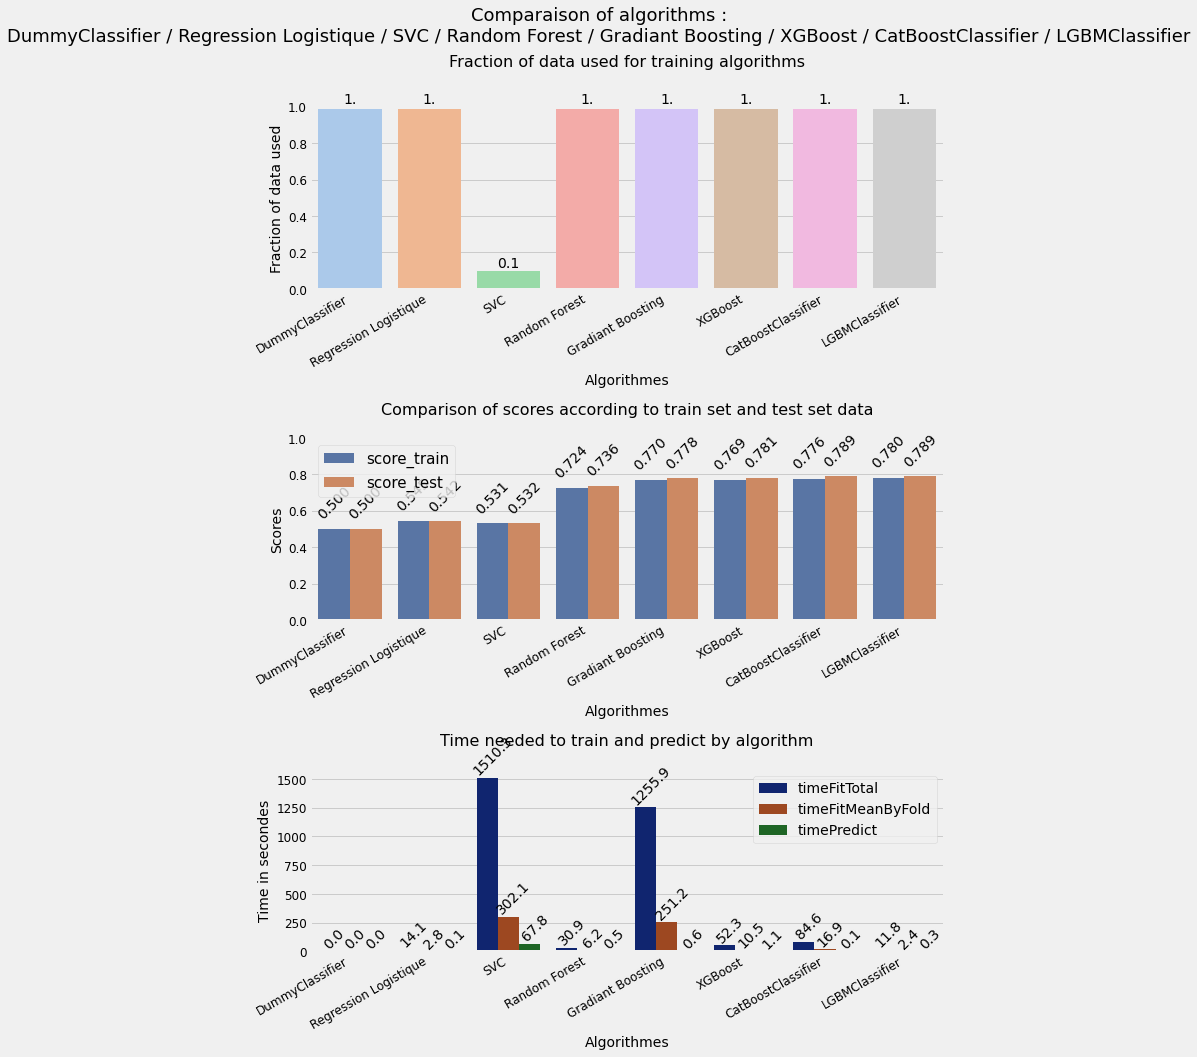

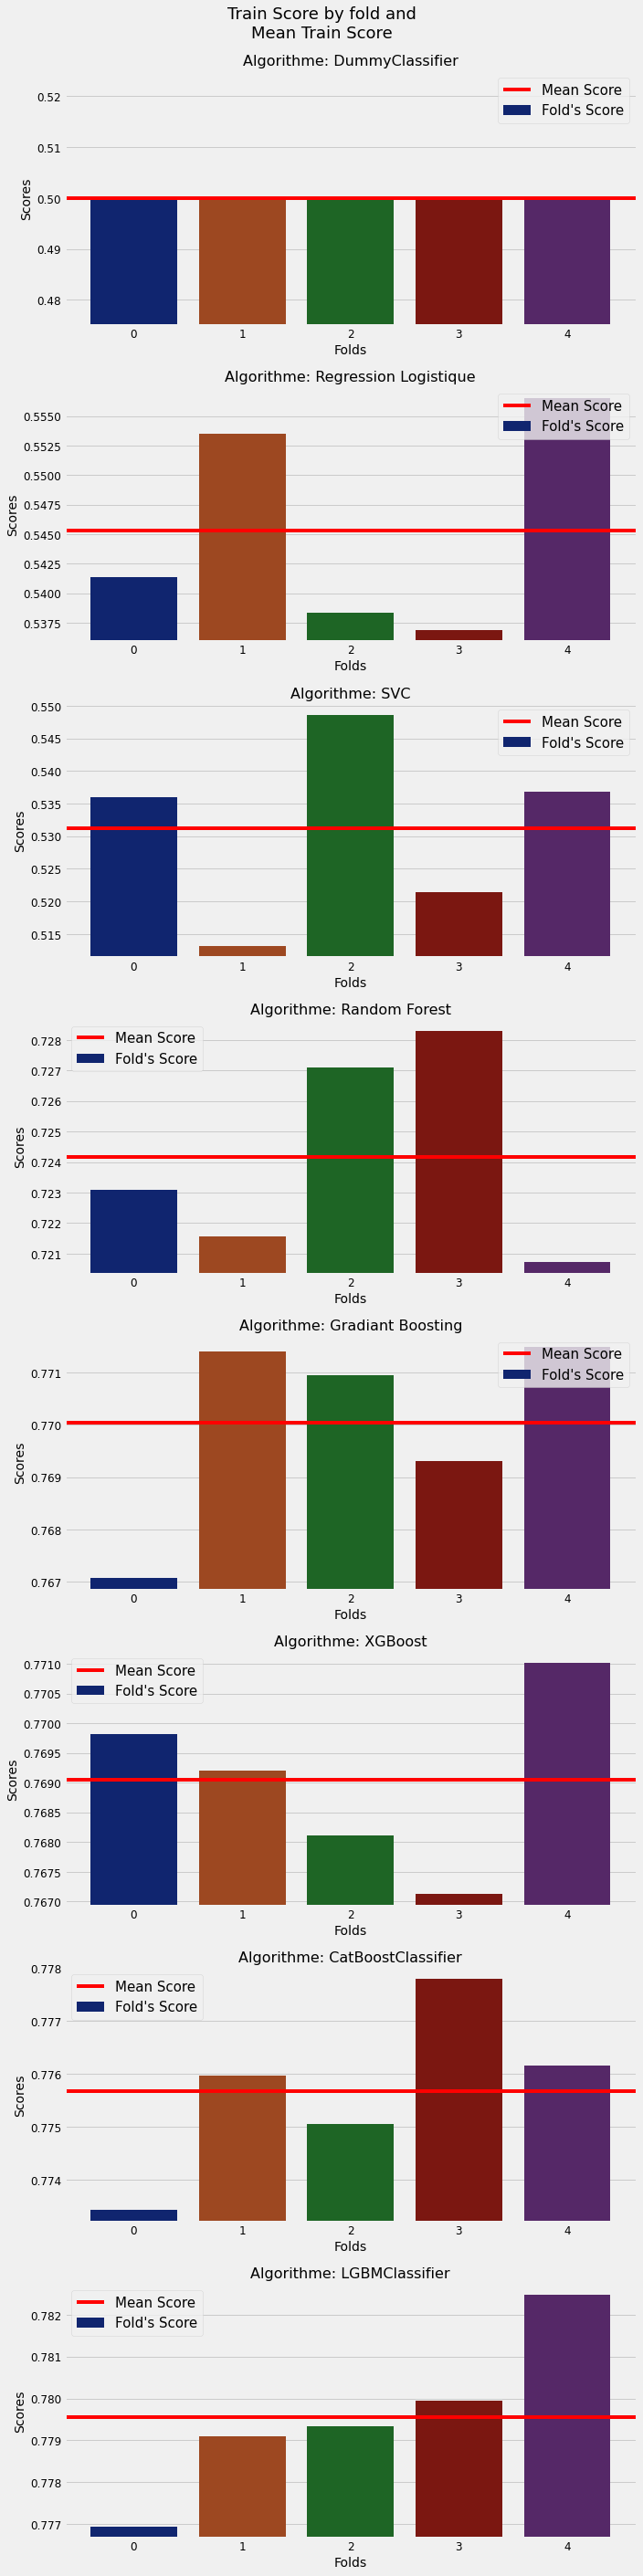

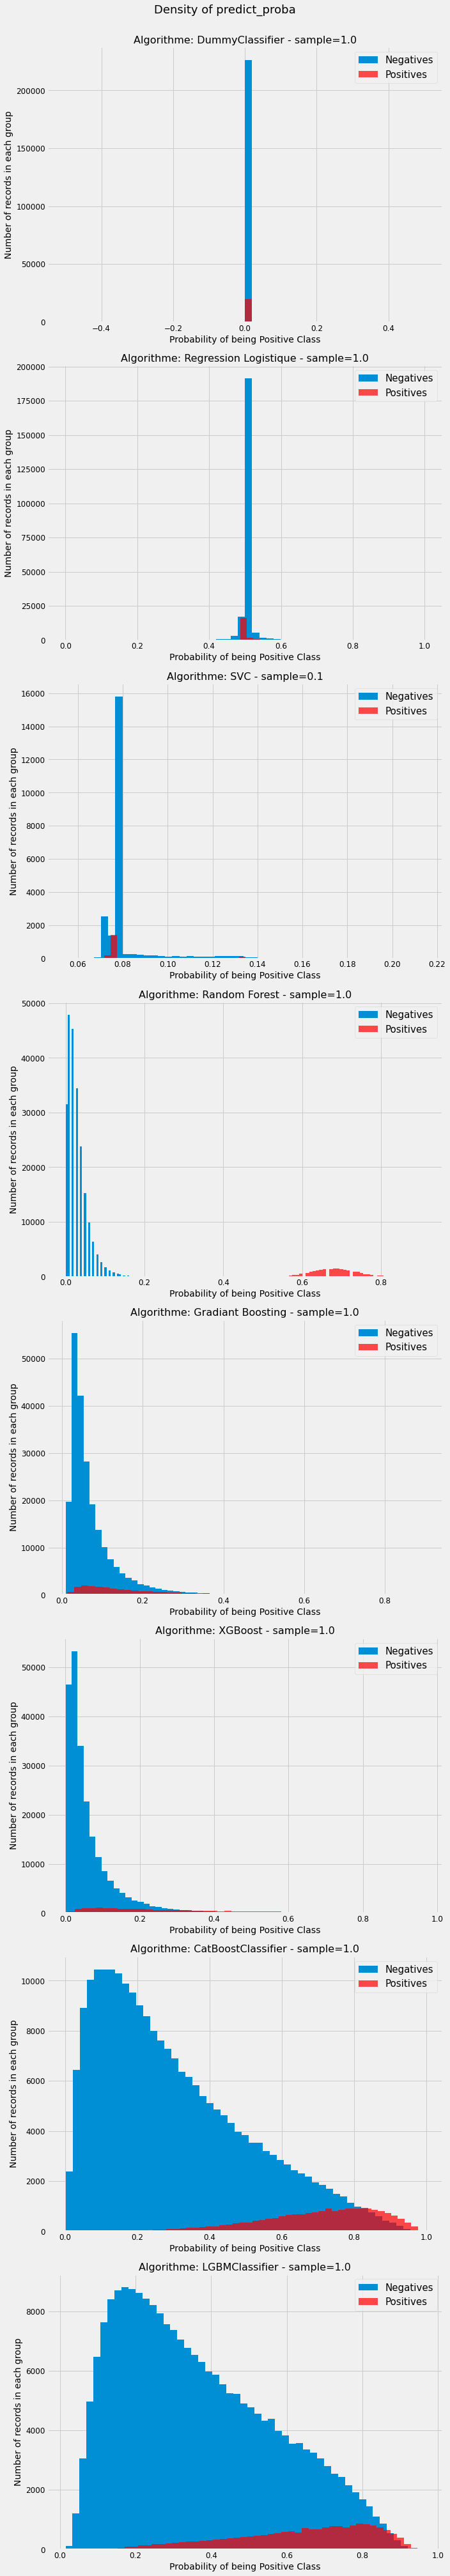

In [70]:
bestAlgo(
    data=df,
    dictAlgo=\
    {
        'DummyClassifier': None,
        'Regression Logistique': None,
        'SVC': None,
        'Random Forest': None,
        'Gradiant Boosting':None,
        'XGBoost':None,
        'CatBoostClassifier':None,
        'LGBMClassifier':None
    },
    listSample=[
        1,
        0.1,
        0.01,
        0.001
    ],
    cv=5,
    showResult=True,
    lvlDebug=2
)

Dummy Classifier est présent comme baseline.

2 algorithmes se distinguent par leur lenteur d'entrainement et<br />
peuvent être mis de côté d'office.<br />
Il s'agit des algorithmes **SVC** et **Gradiant Boosting**.

Dans les algorithmes toujours en course, les meilleurs scores <br />
sur le train-test et le test-set sont obtenus par les algorithmes:
 - Random Forest
 - XGBoost
 - CatBoostClassifier
 - LGBMClassifier
Cependant, **Random Forest** obtient des scores en retrait<br /> 
sur les 3 autres, je décide donc de ne pas retenir cet algorithme.

**LGBMClassifier** suivi de **Random Forrest** sont les algorithmes <br />
les plus rapides à entraîner.<br />
Aucun angorithme ne semble lent à réaliser une prédiction.

Si on s'intéresse aux *scores par fold* alors **CatBoostClassifier** et <br />
**LGBMClassier** semblent les plus performants avec un delta de moins de 2 points <br />
entre les 2 folds de valeurs extrêmes opposées.

Enfin, la densité de probabilités donne des valeurs <br />
intéressantes pour les algorithmes suivants:
- Random Forest
- CatBoostClassifier
- LGBMClassifier

Compte tenu de ces résultats, je décide de ne conserver que <br />
les algorithmes suivants dans la suite de ma recherche <br />
de l'algorithme le plus adapté à notre problématique:
- Random Forest
- CatBoostClassifier
- LGBMClassifier

L'idée est maintenant de réaliser une recherche du meilleur algorithme à partir <br />
d'une liste d'hyperparamètres à tester avec **GridSearchCV**.<br />
Ici aussi nous utilisons la fonction **BestAlgo** qui automatise cette tâche.

<u>Commençons par redénifir la fonction **fitAlgo** en changeant <br />
    la valeur du timeout de son décorateur</u>:<br />
(je retire la docstring pour souci de lisibilité)

In [71]:
@timeout(18000) # 5 hours maximum
def fitAlgo(dictData, algoName, sample):
    printDebug(level=5,levelDebug=globalLevelDebug,indentation=4,startFunction=True)
    
    dictData[algoName].fit(dictData['TrainTest'][sample]['X_train'],
                       dictData['TrainTest'][sample]['y_train'])
    printDebug(level=5,levelDebug=globalLevelDebug,indentation=4,endFunction=True)
    return dictData

bestAlgo - Start
levelDebug=3
	genDictAllDataTrainTest - Sample = 1 - classWeight = {0.0: 0.5439435548421048, 1.0: 6.189116433531247}
	evaluateAlgo - Start - LGBMClassifier
		nbFolds=5
		evaluateAlgo - Boucle For - Start - sample=1
		algoChoice - algo_params: {'boosting_type': 'gbdt', 'class_weight': {0.0: 0.5439435548421048, 1.0: 6.189116433531247}, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': 1, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}
		evaluateAlgo - Boucle For - End - sample=1
		evaluateAlgo - Result - OK
	evaluateAlgo - End
	evaluateAlgo - Start - CatBoostClassifier
		nbFolds=5
		evaluateAlgo - Boucle For - Start - sample=1
		algoChoice - algo_params: {'verbose': False, 'class_weights': {0.0: 0.

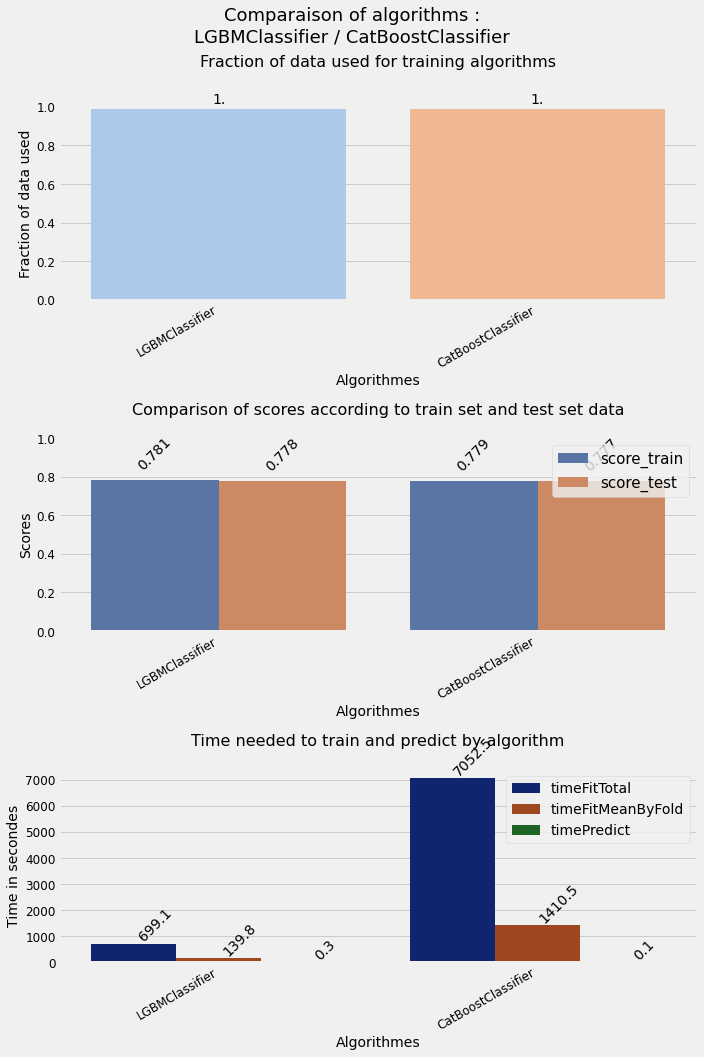

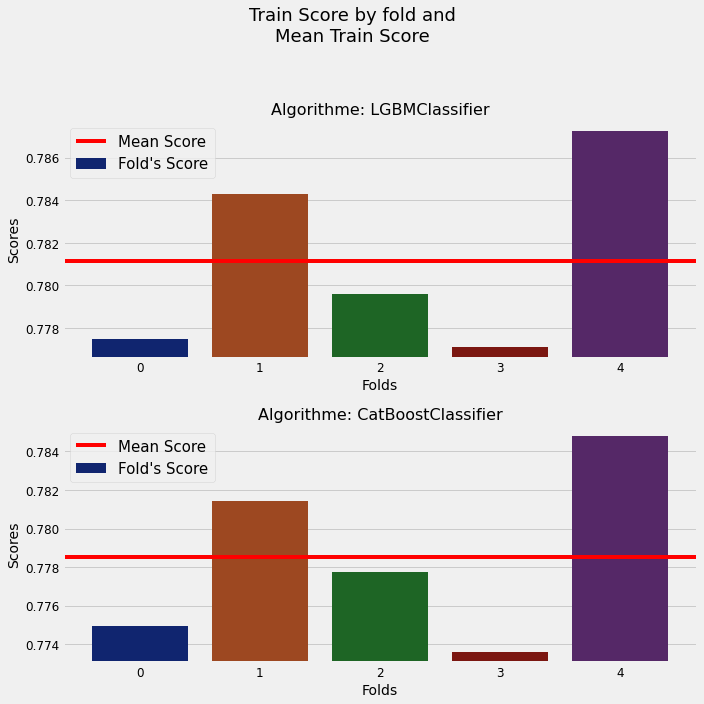

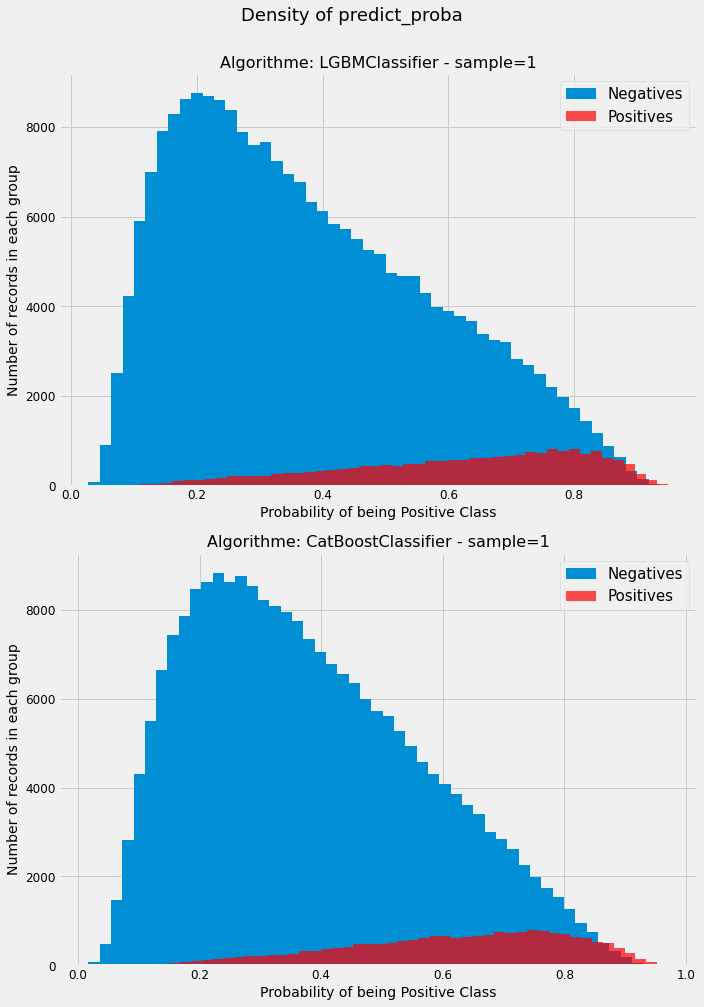

Fichier pickle enregistré: E:\OneDrive\Documents\Formation_DataScientist_OpenClassroom\P7_\pickle\dfResult_2021_06_11_09_03_57.pkl
Fichier pickle enregistré: E:\OneDrive\Documents\Formation_DataScientist_OpenClassroom\P7_\pickle\dictResult_2021_06_11_09_03_57.pkl
Fichier pickle enregistré: E:\OneDrive\Documents\Formation_DataScientist_OpenClassroom\P7_\pickle\dictData_2021_06_11_09_03_57.pkl


In [72]:
result, dictData = bestAlgo(
    data=df,
    dictAlgo=\
    {
        'LGBMClassifier':
        {
            'learning_rate': [0.01,0.1],
            'max_depth': [5,15],
            'num_leaves': [8,16],
            'boosting_type' : ['gbdt', 'dart'] # for better accuracy -> try dart
        },
        'CatBoostClassifier':
        {        
            'max_depth':[3,8],
            'iterations':[500,1000],
            'learning_rate':[0.01,0.3], 
            'thread_count':[4]
        }
    },
    listSample=[
        1
    ],
    cv=5,
    showResult=True,
    returnResult=True,
    returnData=True,
    toPickle=True,
    restartKernel=True,
    lvlDebug=3
)

Les résultats donnent l'avantage à l'algorithme **LGBMClassifier**.<br />
La vitesse d'entrainement de **LGBMClassifier** est près de 4 fois plus rapide.<br />
Cependant c'est sur les scores que la décision est prise<br />
avec respectivement **+0.019** et **+0.02** point d'écart sur le train-set et le test-set.

<u>LGBMClassifier</u>:
- **Score Train-set (moyenne des folds)**: 0.779
- **Score Test-set**: 0.783

<u>CatBoostClassifier</u>:
- **Score Train-set (moyenne des folds)**: 0.760
- **Score Test-set**: 0.763

Concernant la stabilité des scores par fold pour le train-set, le delta maximum<br />
pour **LGBMClassifier** est d'environ **0.0065** alors que<br />
pour **CatBoostClassifier** le delta maximum est de **0.033**.

Enfin, les graphiques représentant la densité de predict_proba <br />
en fonction du label affichent de meilleurs résultats pour **LGBMClassifier**<br />
que pour **CatBoostClassifier**.

En définitif, <u>je choisis de conserver l'algorithme **LGBMClassifier**</u>.<br />
<u>Les paramètres retenus sont</u>:
- '**boosting_type**': 'gbdt'
- '**class_weight**': {0.0: 0.5441192083447611, 1.0: 6.1664661352584345}
- '**colsample_bytree**': 1.0
- '**importance_type**': 'split'
- '**learning_rate**': 0.1
- '**max_depth**': -1
- '**min_child_samples**': 20
- '**min_child_weight**': 0.001
- '**min_split_gain**': 0.0
- '**n_estimators**': 100
- '**n_jobs**': -1
- '**num_leaves**': 31
- '**objective**': None
- '**random_state**': 1
- '**reg_alpha**': 0.0
- '**reg_lambda**': 0.0
- '**silent**': True
- '**subsample**': 1.0
- '**subsample_for_bin**': 200000
- '**subsample_freq**': 0

## 6.3 Définition du Seuil

Lorsqu'on demande à notre modèle d'effectuer <br />
une prédiction sur l'un des clients,le modèle <br />
ne nous retourne pas une classe ou l'autre mais une probabilité.<br />
La modèle nous informe de la probabilité, pour <br />
un client donné, d'appartenir à l'une ou l'autre <br />
des deux classes (0 pour un client qui remboursera <br />
son prêt et qu'on nommera *Bon Client*, ou 1 pour <br />
un client qui ne remboursera pas son prêt (intégralement<br /> 
ou partiellement) et que l'on nommera *Mauvais Client*).

La question que l'on doit se poser est: <br />
*A partir de quel seuil de probabilité allons nous choisir <br />
de classer le client comme un client de confiance <br />
ou un client à risques?*

Pour réponse à cette question il faut bien comprendre <br />
ce que l'on cherche à faire ici.<br />
L'idée finale est de maximiser les gains financiers <br />
de l'entreprise de prêts (et de minimiser ses pertes).<br />
L'entreprise réalise ses bénéfices avec les intêrets <br />
des prêts qu'elle octroie.<br />
Ne pas prêter d'argent à un client qui aurait remboursé <br />
son prêt est un manque à gagner pour l'entreprise.<br />
Cependant, lorsque l'entreprise prête à un client <br />
qui ne pourra pas rembourser son prêt, il s'agit <br />
d'une perte sèche.

On peut aisement comprendre qu'il y a un plus gros risque <br />
de prêter de l'argent à un client qui ne remboursera <br />
pas son prêt, qu'il y a de gain à prêter à un <br />
client qui remboursera et payera ses intêrets.

Il nous faut donc déterminer le coût lorsque l'entreprise <br />
prête à un mauvais client comparé au coût de refuser <br />
de prêter à un bon client.

<u>**FN**(Faux Bon Client)</u>:  Prêt à tort ===> Perte du capital ou partie du capital ===> Perte de beaucoup d'argent<br />
<u>**FP**(Faux Mauvais Client)</u>: Refus à tort de prêt ===> Perte de Marge, Manque à gagner

<u>Hypothèse</u>: Imaginons que nous ayons un capital valant **100**.
 - FN ---> Perte de 50% du capital prêté en moyenne ---> Perte de 50
 - FP ---> Manque à gagner de 1%/an sur en moyenne 10ans <br />(capital va de 100 à 0 soit moyenne de 50) ---> 10% de 50 ---> Perte de 5

<u>Rapport de coût entre FN et FP</u>:
- Les FN coûtent 10 fois plus chers que les FP.
- **1xFN = 10FP**

<u>Objectif:</u>:
 - Optimiser la Matrice de confusion en optimisant la somme de ces 2 coûts.
 - Résoudre: Min(10FN + FP)
 - Tester tous les seuils et calculer cette fonction
 
J'ai créé la fonction **findBestThreshold** qui automatise cette opération.
 
<u>Nous lui fournissons en paramètre</u>:
- **dictData** qui sont les données générées précédemment avec la fonction **bestAlgo**.
- **algo** qui est le nom de l'algorithme à utiliser, <br />
  ici **LGBMClassifier**(qui doit être présent dans dictData).
- **formula** qui est la formule à calculer et dont nous recherchons le minimum.
 

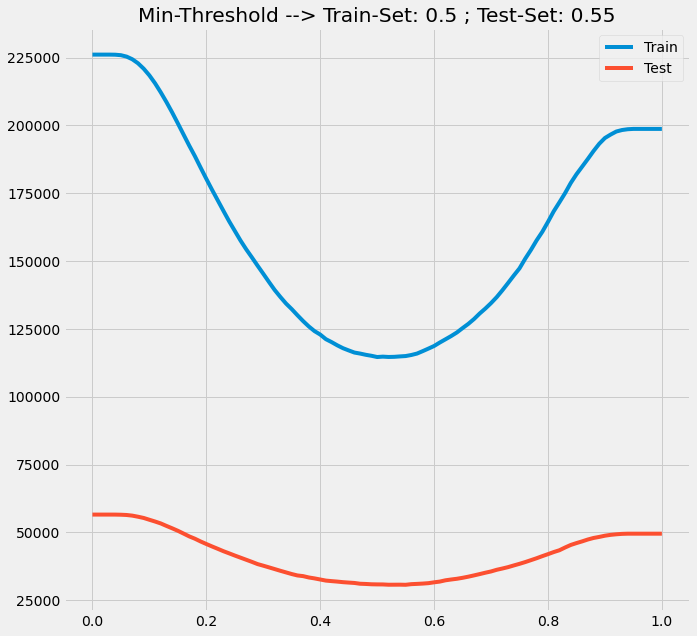

In [73]:
findBestThreshold(dictData, algo='LGBMClassifier', formula='10*fn+fp')

Nous observons le minimum de la fonction à la fois pour le train-set (0.52)<br />
et pour le test-set(0.53).<br />
Ces scores sont très proches de la valeur médiane 0.50.

<u>Deux raisons expliquent ce résultat</u>:
- La formule de coût a été correctement estimée
- La gestion des poids pour réequilibrer le dataset a été efficace

# 7. Dashboard & API

La dernière partie du projet concerne la création et l'utilisation d'un Dashboard interactif.

<u>Ce Dashboard doit</u> :
 - pouvoir être utilisé par une personne non experte en data science
 - avoir ses informations interprétables par une personne non experte en data science
 - permettre de visualiser des informations descriptives relatives à un client
 - permettre de comparer les informations descriptives relatives à un client <br />
   à l’ensemble des clients ou à un groupe de clients similaires.

L'objectif ici est de mettre en application ce que nous avons réalisé jusqu'à présent.<br />
Ce Dashboard pourrait être utilisé par les employés de "**Prêt à dépenser**" pour renseigner <br />
les clients qui leur feraient des demandes de prêt.

L'employé utiliserait alors ce Dashboard pour renseigner <br />
le client de l'acceptation ou du refus de sa demande.<br />
L'employé pourrait en outre commenter la décision au client<br /> 
et lui donner des informations ayant motivé la décision qui lui a été donnée.

Pour l'exercice, les données utilisées dans le Dashboard ont été allégées:
- La base de données client représente 0.1% du jeu de données initiales.
- La liste des clients servant à interroger le modèle est issue du fichier <br />
  **application_test.csv** initialement destiné à être utilisé pour le concours Kaagle. <br />
  Les données qui y sont inscrites n'ont pas été utilisées pour entraîner le modèle <br />
  ce qui est parfait dans notre cas.<br />
  J'ai également allégé ce fichier pour ne conserver que les 30 premières entrées.
  
L'utilisation du Dashboard a été développé en deux parties:
- Partie 1: Le Dashboard
 - Contient tous le code permettant l'affichage de la partie graphique du Dashboard
 - Codé grâce à Streamlit
 - Hebergé sur share.streamlit.io
- Partie 2: l'API
 - Contient le moteur du Dashboard, c'est ici qu'est stocké développé
   le modèle de Machine Learning.
 - Sa principale fonction est de retourner les prédictions <br />
   pour les clients que nous lui soumettons.
 - Codé à partir d'un serveur FLASK
 - Hébergé sur Heroku
 
Les données du Dashboard et de l'API sont toutes deux mises à jours depuis **GitHub**.<br />
J'utilise **GIT** comme outils de versionning et **GitHub** pour uploade rmes données.<br />
Lorsque mes données sont mises à jour sur **GitHub** (détection d'un **PUSH**) alors <br />
les outils qui gèrent le Dashboard (streamlit) et/ou l'API (Heroku) detectent <br />
la mise à jour et réinstall les outils avec les dernières données disponibles.


## 7.1 URL

Le dashboard est accessible à cette adresse: https://share.streamlit.io/jeremieaucher/p7_dashboard/main/dashboard.py

## 7.2 Pré-Visualisation du dashboard


![Vu du dashboard](img/dashboard.png)

## 7.3 Passage en revue des différentes parties du Dashboard

Je vais passer en revue chaque élément du Dashboard et expliquer ainsi la manière<br />
dont j'ai voulu le concevoir pour qu'il soit à la fois lisible, intuitif et <br />
efficace à l'utilisation pour une personne non-experte en data science.

Comme vous pouvez le constater, la composition de la page se fait en 1 ou 2 colonnes <br />
selon le nombre d'éléments affichés sur une même ligne.

### 7.3.1 Partie Haute - Logo, Saisie et Validation du prêt

#### 7.3.1.1 Logo

![Haut du dashboard](img/dashboard_haut.png)

En haut à gauche le logo de l'entreprise.

En haut à droite on retrouve le titre qui présente la fonction de la page "Simulation de prêt" <br />
puis en dessous "Obtenez une réponse instantanément" présenté comme un argument marketing.

#### 7.3.1.2 Saisie du numéro de prêt

Enfin, en dessous nous retrouvons une selectbox:

![Selectbox](img/dashboard_selection_client.png)

Cette selectbox nous permet au choix:
 - de rentrer un numéro de prêt
 - de choisir parmi une liste de prêts existants

Il suffit de commencer à saisir un numéro de prêt pour que la selectbox affine<br />
la liste des prêts disponibles correspondant aux numéros saisis.

#### 7.3.1.3 Validation ou Refus du prêt

Une fois le numéro de prêt saisi, la page se recharge.<br />
S'affiche ensuite un panel d'informations, à commencer par la validation du prêt... ou non.

![Validation du pret <](img/dashboard_validation_pret.jpg)   
![Refus du pret <](img/dashboard_refus_pret.jpg)

<br /><br /><br /><br /><br /><br />


### 7.3.2 Partie Centrale

#### 7.3.2.1 Gauge Chart

![Gauge Chart](img/dashboard_gauge.png)

Ce graphique affiche le score du client.<br />
Le score va de -1 à 1.<br />
La limite d'acceptation du prêt est fixé à 0.

<u>**Important**</u> : L'affichage du score est indépendant du modèle utilisé et du seuil fixé sur celui-ci.<br />
Dans notre exemple, le modèle fourni une probabilité allant de 0 à 1 avec un seuil fixé à 0.52.<br />
Pour optimiser et faciliter la lecture du résultat le score est systématiquement converti<br />
selon les borne [-1;1] avec un seuil fixé à 0.<br />
Cela permet de pouvoir changer de modèle et/ou de seuil sans affecter la lecture du résultat.

La score s'affiche en blanc.<br />
En violet, en dessous du score s'affiche le delta entre le score <br />
et le seuil d'acceptation du prêt.<br />
Une gauge permet d'afficher le score du client le long d'un axe <br />
en demi-cercle à la façon d'un compteur de voiture.

#### 7.3.2.2 Logo d'acceptation ou de refus de prêt

Sur la droite de la gauge chart s'affiche en grand un logo à la signification très évocatrice.<br />
Pour appuyer la lecture de la décision d'accepter ou de refuser le prêt, un logo vient<br />
confirmer en 2ème lecture la compréhension immédiate du client.

![Validation du pret](img/dashboard_validation_OK.png)   
![Refus du pret](img/dashboard_validation_NOK.png)

#### 7.3.2.3 Graphiques des features importances 

Les modèles de Machine Learning peuvent être décrites comme des sortes de boîtes noires.<br />
Des décisions sont prises sans que l'on puisse savoir exactement sur quels critères et <br />
celà peut être source d'incompréhension ou même de frustration ou d'injustice dans <br />
le cas d'un refus d'optention de prêt.

Pour remédier à celà, nous allons utiliser la bibliothèque **SHAP**.<br />
Grace à elle nous allons être capables d'expliquer les choix de notre modèle de Machine Learning.

Non seulement nous saurons quelles sont les features qui ont le plus contribuées à la prise <br />
de décision mais nous saurons également si elles ont pesé d'une manière positive ou <br />
négative dans la décision finale.

Dans notre cas celà est très important afin de fournir un maximum de transparence au client.

La bibliothèque **SHAP** ne donne pas accès par défaut au tableau de données permettant d'afficher <br />
les graphiques des features importance locales et globales.<br />
Elle fournit à la place des méthodes permettant de générer directement des graphiques.<br />
Les graphiques fournis sont assez austères à mon gout et surtout, ils ne sont pas intéractifs.

J'ai créé une fonction me permettant de générer les données au format *dataframe pandas* <br />
pour ensuite les afficher avec la bibliothèque **plotly**.<br />
Il suffit de survoler les graphiques du dashboard pour obtenir des informations complémentaires.

##### 7.3.2.3.1 Globales

Ce graphique affiche les features qui, d'une manière générale, <br />
ciontribuent le plus dans l'attribution d'un prêt.<br />
Ce graphique ainsi que le suivant sont les moins intuitifs, <br />
et pour être bien appréhendé par le client,<br />
l'aide de l'opérateur sera nécessaire.

![Feature Importance Global](img/dashboard_global_features_importance.png)

##### 7.3.2.3.2 Locales

Il s'agit d'un graphique très important puisqu'il indique<br />
au client les caractéristiques qui ont le plus contribué <br />
(positivement ou négativement) à l'attribution ou non de son prêt.

![Feature Importance Local](img/dashboard_local_features_importance.png)

#### 7.3.2.4 Analyse mono-variée / Diagramme de distribution pour le choix de la 1ère et 2nd caractéristique

J'affiche ensuite sur deux colonnes des selectbox permettant de sélectionner <br />
parmi les caractéristiques importantes du client.<br />
Le contenu de ces selectbox est généré spécifiquement pour chaque client.<br />
Les selectbox sont présélectionnées avec les features les plus importantes du client.<br />

Le choix d'une caractéristique affiche un diagramme de distribution.<br />
Il s'agit d'une analyse mono-variée.<br />
La distribution représente les différentes valeurs de la caractéristique <br />
selon les différents clients qui ont servi de référence pour entraîner le modèle.<br />
Il s'agit en réalité que d'une fraction de ces clients pour des soucis de lisibilité.

Le graphique affiche la distribution des clients selon l'acceptation de leur demande de prêt.

J'affiche, représenté par une ligne verticale en rouge pointillé, la position du client <br />
selon la valeur qu'il possède pour cette caractéristique.

Le client peut donc se situer par rapport aux autres clients et observer si, <br />
à sa valeur pour cette caractéristique, la majorité des clients ayant cette <br />
même valeur ou une valeur proche ont, dans leur majorité, vu leur prêt refusé ou accepté.

![premiere et seconde caracteristique distplot](img/dashboard_premiere_et_seconde_caracteristique_distplot.png)

#### 7.3.2.5 Analyse bi-variée / Scatter Plot 2D

Lorsque le client a terminé de choisir les 2 premières caractéristiques à analyser, <br />
il peut consulter un scatter plot qui affiche une analyse bi-variée.

Chaque point représente un client.<br />
En bleu les clients qui ont vu leur prêt accepté.<br />
En rouge les clients qui ont vu leur prêt refusé.

La position du client est représenté par l'intersection de deux lignes rouges, horizontale et verticale.<br />

![premiere et seconde caracteristiques scatterplot2d](img/dashboard_scatterplot2d.png)

#### 7.3.2.6 3ème caractéristique et Scatter Plot 3D

Il est possible de choisir une 3ème caractéristique.

En dessous s'affiche un scatter plot en 3D où chaque dimension <br />
représente l'une des 3 caractéristiques selectionnées précédement.

Ici le client est représenté par une sphère d'une couleur différente<br />
des autres clients, qui ici aussi sont soit bleu si leur prêt a été refusé, <br />
ou jaune si leur prêt a été accepté.

Le graphique est interactif, il est possible de le faire pivoter, de zoomer etc.

![premiere seconde et troisieme caracteristiques scatterplot3d](img/dashboard_scatterplot3d.png)

# 8. Conclusion

Nous avons commencé par effectuer une analyse exploratoire<br />
des données en nous appuyant sur un kernel existant.<br />
Nous avons ensuite sélectionné le meilleur modèle en prenant soin de comparer <br />
chaque modèle avec strictement les mêmes jeux de données pour ne pas fausser les résultats.<br />
Les modèles on été comparés selon la métrique ROC AUC.<br />
Le modèle que nous avons sélectionné est LGBMClassifier.

L'algorithme nous retourne alors une probabilité, pour chaque client, <br />
d'appartenir à la classe *mauvais client* ou *bon client*.

Nous avons vu qu'il est plus risqué de prêter à un mauvais client <br />
que de ne pas prêter à un bon client.<br />
Nous avons posé mathématiquement le problème puis nous avons pu déterminer <br />
le seuil à partir duquel l'algorithme devait choisir de considérer un client <br />
comme bon ou mauvais.

Une fois le modèle parfaitement paramétré, nous avons pu commencer <br />
à développer notre dashboard intéractif.

A destination des gestionnaires de la relation client il devait permettre:
 - d'interpréter les prédictions faites par le modèle
 - d'être compréhensible par un publique non expert en data science
 - d'offrir plus de transparence sur la prise de décision <br />
   du model d'accorder un prêt ou non
   
Nous tenons compte du contenu du cahier des charges,<br />
et avons déployé le dashboard en deux parties:
- le dashboard proprement dit, c'est à dire la partie interactive,<br />
  saisie du numéro de prêt, affichage des graphiques etc.
- l'API, stocké sur un autre serveur, qui contient le modèle<br />
  et qui peut être requêté à distance.
  
Le dashboard est accessible à cette URL: https://share.streamlit.io/jeremieaucher/p7_dashboard/main/dashboard.py
